<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
      <li><span style="font-weight: normal;"><a href="#DP_FeatureEng">Feature Engineering</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#1-outliers">Outliers</a></span></li>
        <li><span style="font-weight: normal;"><a href="#2-missing-values">Missing Values</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#categorical-variables-aproach">Categorical Variables Approach</a></span></li>
          <li><span style="font-weight: normal;"><a href="#fill-missing-values-with-central-tendency-measures">Fill Missing Values with Central Tendency Measures</a></span></li>
          <li><span style="font-weight: normal;"><a href="#knn-imputer">KNN Imputer</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#3-encoding">Categorical Variables (Encoding)</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#target-encoding">Target Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#label-ordinal-encoding">Label/Ordinal Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#one-hot-encoding">One-Hot Encoding</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#4-multicollinearity">Multicollinearity</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#variance-inflation-factor-vif">Variance Inflation Factor (VIF)</a></span></li>
        </ol>
      </ol>
      <li><span style="font-weight: normal;"><a href="#🎚️-feature-selection">Feature Selection</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#filter-methods--correlation-between-variables">Filter Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#correlation-coefficient">Spearman Correlations</a></span></li>
          <li><span style="font-weight: normal;"><a href="#chi-square-test">Chi-Square Test</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#wrapper-methods">Wrapper Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#rfe">RFE (Recursive Feature Elimination)</a></span></li>
      </ol>
      <li><span style="font-weight: normal;"><a href="#embedded-methods">Embedded Methods</a></span></li>
      <ol style="list-style-type:lower-alpha;">
        <li><span style="font-weight: normal;"><a href="#ridge-regression-l2-regularization">Ridge Regression</a></span></li>
        <li><span style="font-weight: normal;"><a href="#lasso-regression-least-absolute-shrinkage-and-selection-operator">Lasso Regression</a></span></li>
      </ol>
    </ol>  
  </li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [1]:
# For data
import pandas as pd
import numpy as np

import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.colors as mcolors


# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Wrapper methods - Recursive Feature Elimination (RFE)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFE
from tqdm import tqdm                         # For progress bar

# Embedded methods
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## **🧮 Import Databases**

In [2]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [3]:
# Display the first 2 rows of each dataset
# train_data.head(2) 

In [4]:
# test_data.head(2)

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

In [5]:
# Palette of colors | Blues
palette = ['#002147', '#084594', '#135C9B', '#2171B5', '#4292C6', '#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEBF7', '#F7FBFF']

# Dictionary Palette of colors for 'Claim Injury Type'
claim_injury_type_palette = dict(zip(sorted(train_data["Claim Injury Type"].unique()), palette))
claim_injury_type_palette

{'1. CANCELLED': '#002147',
 '2. NON-COMP': '#084594',
 '3. MED ONLY': '#135C9B',
 '4. TEMPORARY': '#2171B5',
 '5. PPD SCH LOSS': '#4292C6',
 '6. PPD NSL': '#6BAED6',
 '7. PTD': '#9ECAE1',
 '8. DEATH': '#C6DBEF'}

### **🛠️ Drop  Columns Unnecessary for the Model**

In [6]:
# Transform the 'Assembly Date Day', 'Assembly Date Month', 'Assembly Date Year' and 'Assembly Date Weekday' columns to 'int64' type 
# [Just to be more easy to be treated like other date columns]
train_data['Assembly Date Day'] = train_data['Assembly Date Day'].astype('int64')
train_data['Assembly Date Month'] = train_data['Assembly Date Month'].astype('int64')
train_data['Assembly Date Year'] = train_data['Assembly Date Year'].astype('int64')
train_data['Assembly Date Weekday'] = train_data['Assembly Date Weekday'].astype('int64')

test_data['Assembly Date Day'] = test_data['Assembly Date Day'].astype('int64')
test_data['Assembly Date Month'] = test_data['Assembly Date Month'].astype('int64')
test_data['Assembly Date Year'] = test_data['Assembly Date Year'].astype('int64')
test_data['Assembly Date Weekday'] = test_data['Assembly Date Weekday'].astype('int64')

In [7]:
# Sort columns alphabetically
train_data = train_data.reindex(sorted(train_data.columns), axis=1)
test_data = test_data.reindex(sorted(test_data.columns), axis=1)

# train_data.info()

In [8]:
# Drop the columns based on the analysis of the data
columns_to_drop = [
    'Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date',
    # Because cannot be used AS IS -> we have all extracted columns from it [Year, Month, Day, Weekday]
    
    'Age at Injury',                     # Because we have Age at Injury Cleaned [Deterministically imputed missing values]
    'Birth Year',                        # Because we have Age at Injury Cleaned [It's redundant since we have 'Age at Injury Clean']
    'Birth Year Clean',                  # Because we have Age at Injury Cleaned [It's redundant since we have 'Age at Injury Clean']
    'Average Weekly Wage',               # Because we create a new column from it ['Weekly Wage Reported'] + If we consider 0's as missing values, we have +60%/+86% (Train/Test) missing values
    'IME-4 Count',                       # Because we create a new column from it ['IME-4 Reported'] + If we consider 0's as missing values, we have +75%/+90% (Train/Test) missing values
    'Carrier Name',                      # Because we don't know how to treat text for now
    'Industry Code',                     # Because we will use 'Industry Code Description' that have same information [It's redundant]
    'Zip Code',                          # Because a inconsistent and unique values + We have 'County' column that have same information (Theoretically)
    'WCIO Cause of Injury Code',         # Because we will use 'WCIO Cause of Injury Description'
    'WCIO Part Of Body Code',            # Because we will use 'WCIO Part of Body Description'
    'WCIO Nature of Injury Code',        # Because we will use 'WCIO Nature of Injury Description'
    
    'Carrier Type',                      # Because we have 'Carrier Type Bucket'
    'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
    'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
    'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'

    # Dates columns that we don't need after creating binary columns (because they have a lot of missing values >70%)
    'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
    'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = columns_to_drop)
test_data = test_data.drop(columns = columns_to_drop)

In [9]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Age at Injury Group', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'COVID-19 Indicator', 'Carrier Type Bucket',
       'Claim Injury Type', 'County of Injury', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Accident Date Binary            574026 non-null  int32  
 1   Accident Date Day               570337 non-null  float64
 2   Accident Date Month             570337 non-null  float64
 3   Accident Date Weekday           570337 non-null  float64
 4   Accident Date Year              570337 non-null  float64
 5   Age at Injury Clean             571840 non-null  float64
 6   Age at Injury Group             574026 non-null  object 
 7   Alternative Dispute Resolution  574026 non-null  object 
 8   Assembly Date Day               574026 non-null  int64  
 9   Assembly Date Month             574026 non-null  int64  
 10  Assembly Date Weekday           574026 non-null  int64  
 11  Assembly Date Year              574026 non-null  int64  
 12  Attorney/Repre

In [11]:
# Numerical columns
numerical_columns = [
    'Accident Date Day', 'Accident Date Month', 'Accident Date Weekday', 'Accident Date Year', 
    'Age at Injury Clean', 
    'Assembly Date Day', 'Assembly Date Month', 'Assembly Date Weekday', 'Assembly Date Year',
    'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
    'Number of Dependents']

# Categorical columns
categorical_columns = [
    # Original columns
    "Age at Injury Group",
    
    # Binary/Nominal columns    
    "Accident Date Binary", "C-2 Date Binary", "C-3 Date Binary", "First Hearing Date Binary",
    "Alternative Dispute Resolution", "Attorney/Representative", "COVID-19 Indicator", "Gender",
    "Carrier Type", "Carrier Type Bucket",
    "County of Injury", "District Name", "Medical Fee Region",
    "Weekly Wage Reported", "IME-4 Reported",
    "Industry Code Description", 
    "WCIO Cause of Injury Bucket", "WCIO Cause of Injury Description",
    "WCIO Part of Body Bucket", "WCIO Part Of Body Description",
    "WCIO Nature of Injury Bucket", "WCIO Nature of Injury Description"
]    

# Target column
target_column = ['Claim Injury Type']

In [12]:
# Check if numerical_columns + categorical_columns + target_column = all columns
len(train_data.columns) == len(numerical_columns + categorical_columns + target_column)

# See the columns that are not in the 'numerical_columns' + 'categorical_columns' + 'target_column'
# set(train_data.columns) - set(numerical_columns + categorical_columns + target_column)
# set(numerical_columns + categorical_columns + target_column) - set(train_data.columns)

False

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [13]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [14]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 33), (143507, 33))

In [15]:
# # Check the unique values of each column
# for col in X_train.columns:
#     unique_values = sorted(X_train[col].unique(), key=lambda x: (str(type(x)), x))
#     # print(f"\033[1m{col}\033[0m [{X_train[col].nunique()}]")
#     print(f'\033[1m{col}\033[0m [{X_train[col].nunique()}]: {unique_values}')

In [16]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [17]:
# Check the information of the training set
# X_train.info()

In [18]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
       'Industry Code Description'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅
  - Grouping of values into "bins" or "buckets"

1. **Splitting the Data** ✅
    - Training Data
    - Validation Data

2. **Handling Outliers** ✅
 

2. **Handling Missing Values**
    - Drop  Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize**
    - Normalize and Standardize using Scikit-learn

<br>

---

#### **1 | Handling Outlier Values** <a class='anchor' id='1-outliers'></a>

To address outlier values, we considered three primary strategies:

- **Total or partial removal**: This involves removing all outliers or a subset based on a predefined threshold.
- **Adjust values to reduce extremity**: Known as "winsorizing," this approach modifies extreme values to bring them closer to the general range, based on a threshold established a priori.
- **Retain all values**: This approach keeps all data points, preserving the full range of variability.

We chose to retain all outlier values to maintain data integrity and avoid introducing potential biases. Removing outliers risks eliminating natural variability, potentially distorting the data's inherent distribution. Additionally, the process of outlier removal can be subjective, introducing bias by making arbitrary decisions on which data points to exclude. Keeping all data points avoids arbitrary decisions that could affect the analysis.


Although we did not remove outliers directly, two preprocessing steps implemented throughout the project helped mitigate their impact:

- **Feature transformation**: By applying transformations such as log transformations -  extremely high or low values are compressed, reducing their influence on the model.
- **Creation of new features**: New features, such as ‘Weekly Wage Reported’ and ‘IME-4 Reported,’ helped manage outliers by focusing on binary indicators rather than raw values. This approach simplifies complex variables, reducing the impact of extreme values and enhancing the model's robustness against variability.

In [19]:
# Define function for outlier detection, based on IQR method
def detect_outliers(df,features, dfoutput=False, info=True):
    """
    Detect outliers in the DataFrame based on the InterQuartile Range (IQR) method.

    Args:
        df (pd.DataFrame): The DataFrame to detect the outliers.
        features (list): The list of features to detect the outliers.
        dfoutput (bool, optional): Boolean to return the DataFrame with the outliers. Defaults to False.
        info (bool, optional): Boolean to print the information about the outliers. Defaults to True.

    Returns:
        pd.DataFrame: DataFrame with the outliers (if dfoutput=True).
        pd.DataFrame: Information about the outliers (if info=True and dfoutput=False or info=True and dfoutput=True).
    """
    # Check if features is a list
    if not isinstance(features, list):
        features = [features]
    
    if len(features) == 0:
        return []
    
    # Detect outliers in 1 features
    for feature in features:
        Q1 = df[feature].quantile(0.25)       # 1st quartile
        Q3 = df[feature].quantile(0.75)       # 3rd quartile
        IQR = Q3 - Q1                         # InterQuartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Print the information about the outliers
        if info:
            # print('\033[1m', feature, '\033[0m',
            #         '\n  1st Quartile:', Q1, '  | 3rd Quartile:', Q3, '  | IQR:', IQR,
            #         '\n  Lower Bound:', lower_bound, '  | Upper Bound:', upper_bound,
            #         '\n\n  Number of outliers:', len(outliers), '(', round(len(outliers)/len(df)*100, 2), '%)',
            #         '\n    Min:', outliers[feature].min(), '  | Max:', outliers[feature].max(), '\n')
            
            # Save the information that are printed in a DataFrame format
            outliers_info = pd.DataFrame({
                'Feature': feature,
                '1st Quartile': Q1,
                '3rd Quartile': Q3,
                'IQR': IQR,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers (%)': round(len(outliers)/len(df)*100, 2),
                'Min': outliers[feature].min(),
                'Max': outliers[feature].max()
            }, index=[0])
            
            # Return the DataFrame with the information about the outliers
            return outliers_info
            
        # Return DataFrame with the outliers and the information about the outliers
        if dfoutput:
            return outliers_info, outliers

In [20]:
# Apply the function 'detect_outliers' to all the metric columns [Train Data]
for col in train_data[numerical_columns].columns:
    # If it is the first column, save the information about the outliers
    if col == train_data[numerical_columns].columns[0]:
        outliers_info = detect_outliers(train_data, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info = pd.concat([outliers_info, detect_outliers(train_data, col, info=True)], ignore_index=True)
    
outliers_info.set_index('Feature', inplace=True)

# Filter the DataFrame to only show the columns that have outliers
outliers_info = outliers_info[outliers_info['Number of Outliers'] > 0]

# Personalize the DataFrame with a grey color for the rows without outliers
def highlight_no_outliers(row):
    # Check if the "Number of Outliers" column is zero
    if row['Number of Outliers'] > 0:
        return ['background-color: #DEEBF7'] * len(row)
    return [''] * len(row)

# Apply styling to the DataFrame
outliers_info.style.format({
    col: '{:.2f}' for col in outliers_info.select_dtypes('float64').columns
}).apply(highlight_no_outliers, axis=1)

,1st Quartile,3rd Quartile,IQR,Lower Bound,Upper Bound,Number of Outliers,Percentage of Outliers (%),Min,Max
Feature,,,,,,,,,
Accident Date Year,2020.00,2022.00,2.00,2017.00,2025.00,4865,0.85,1961.00,2016.00
Age at Injury Clean,31.00,54.00,23.00,-3.50,88.50,290,0.05,89.00,122.00
C-2 Date Year,2020.00,2022.00,2.00,2017.00,2025.00,1213,0.21,1996.00,2016.00


In [21]:
# Apply the function 'detect_outliers' to all the metric columns [Test Data]
for col in test_data[numerical_columns].columns:
    # If it is the first column, save the information about the outliers
    if col == test_data[numerical_columns].columns[0]:
        outliers_info_test = detect_outliers(test_data, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info_test = pd.concat([outliers_info_test, detect_outliers(test_data, col, info=True)], ignore_index=True)
        
outliers_info_test.set_index('Feature', inplace=True)

# Filter the DataFrame to only show the columns that have outliers
outliers_with_values_test = outliers_info_test[outliers_info_test['Number of Outliers'] > 0]

# Apply styling to the filtered DataFrame
outliers_with_values_test.style.format({
    col: '{:.2f}' for col in outliers_with_values_test.select_dtypes('float64').columns
}).apply(highlight_no_outliers, axis=1)

,1st Quartile,3rd Quartile,IQR,Lower Bound,Upper Bound,Number of Outliers,Percentage of Outliers (%),Min,Max
Feature,,,,,,,,,
Accident Date Year,2023.00,2024.00,1.00,2021.50,2025.50,4314,1.11,1966.00,2021.00
Age at Injury Clean,30.00,53.00,23.00,-4.50,87.50,616,0.16,88.00,120.00
C-2 Date Year,2023.00,2024.00,1.00,2021.50,2025.50,536,0.14,1985.00,2021.00


##### **Outliers Detection | Notes:**

Using **IQ Range** to detect outliers(consider as outliers values that are **$1.5 \times IQR$** below the **Q1** or above the **Q3**), we identified the following variables with outliers:

- **`Accident Date Year`** - By virtue of this variable have outliers on both datasets (Train and Test), we will not remove them.
  - So, we will try to logarithmize this variable to reduce the impact of outliers.
- **`C-2 Date Year`** - Once again, the strategy of logarithmize this variable will be used to reduce the impact of outliers.
- **`Age at Injury Clean`** - Since we create a new variable **`Age at Injury Groups`** that groups the ages, we will not need to remove the outliers from this variable, and the new variable will be used in the model.
- **`WCIO Part Of Body Code`** - We will not remove the outliers from this variable, and the new variable **`WCIO Part Of Body Buckets`** will be used in the model.

In [22]:
# Apply LogScaler to the 'Accident Date Year' and 'C-2 Date Year' columns
# Log Transformation - Logarithm of the values in the dataset (Base e - default)
X_train['Accident Date Year_Log'] = np.log(X_train['Accident Date Year'])
X_train['C-2 Date Year_Log'] = np.log(X_train['C-2 Date Year'])

X_val['Accident Date Year_Log'] = np.log(X_val['Accident Date Year'])
X_val['C-2 Date Year_Log'] = np.log(X_val['C-2 Date Year'])

test_data['Accident Date Year_Log'] = np.log(test_data['Accident Date Year'])
test_data['C-2 Date Year_Log'] = np.log(test_data['C-2 Date Year'])

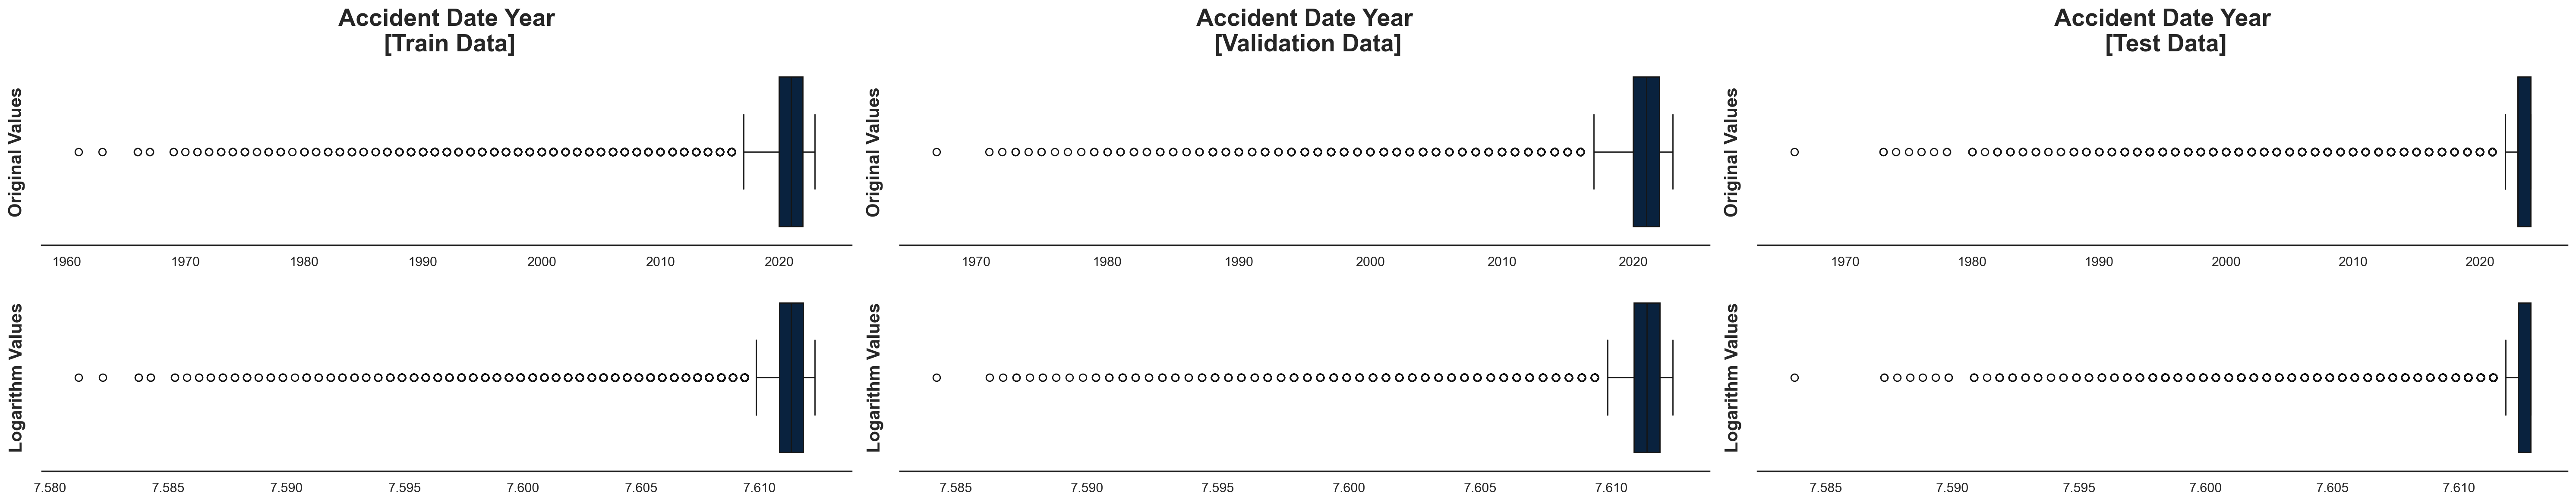

In [23]:
# Boxplots with Original and Logarithm values of 'Accident Date Year' [Train, Validation and Test Data]
fig, ax = plt.subplots(2, 3, figsize=(30, 6))

# Define the datasets and their corresponding titles
datasets = [(X_train, 'Train Data'), (X_val, 'Validation Data'), (test_data, 'Test Data')]
columns = ['Accident Date Year', 'Accident Date Year_Log']

# Iterate over the datasets and subplot positions
for i, (data, title) in enumerate(datasets):
    for j, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=ax[j, i], color=palette[0])
        if j == 0:
            ax[j, i].set_title(f'Accident Date Year\n [{title}]', fontsize=20, fontweight='bold')
            ax[j, i].set_ylabel('Original Values', fontsize=15, fontweight='bold')
        else:
            ax[j, i].set_ylabel('Logarithm Values', fontsize=15, fontweight='bold')
        ax[j, i].set_xlabel('')

# Adjust the layout
sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

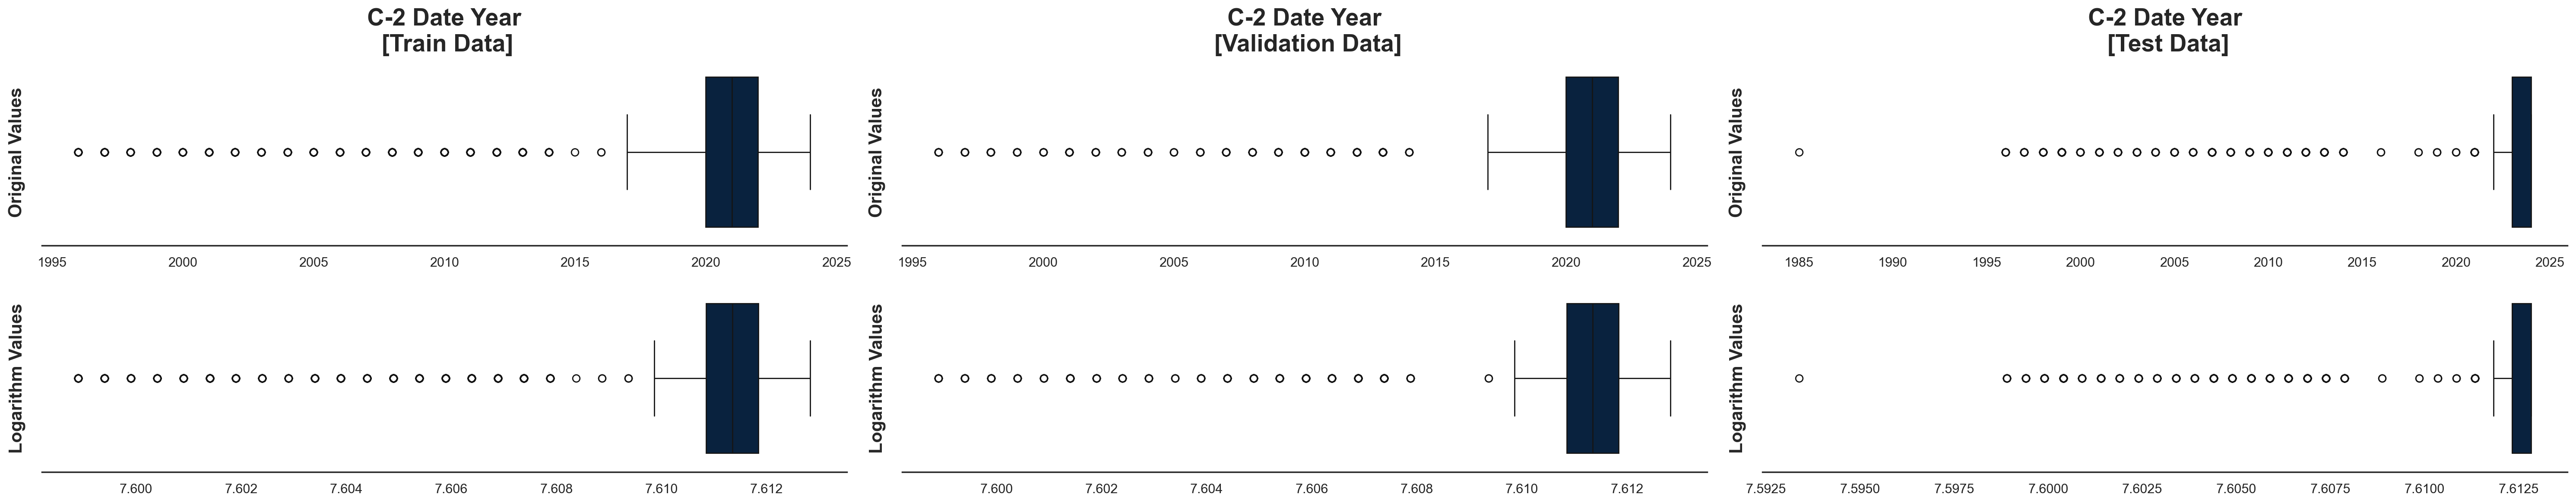

In [24]:
# Boxplots with Original and Logarithm values of 'C-2 Date Year' [Train, Validation and Test Data]
fig, ax = plt.subplots(2, 3, figsize=(30, 6))

# Define the datasets and their corresponding titles
datasets = [(X_train, 'Train Data'), (X_val, 'Validation Data'), (test_data, 'Test Data')]
columns = ['C-2 Date Year', 'C-2 Date Year_Log']

# Iterate over the datasets and subplot positions
for i, (data, title) in enumerate(datasets):
    for j, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=ax[j, i], color=palette[0])
        if j == 0:
            ax[j, i].set_title(f'C-2 Date Year\n [{title}]', fontsize=20, fontweight='bold')
            ax[j, i].set_ylabel('Original Values', fontsize=15, fontweight='bold')
        else:
            ax[j, i].set_ylabel('Logarithm Values', fontsize=15, fontweight='bold')
        ax[j, i].set_xlabel('')

# Adjust the layout
sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

> This strategy doesn't seem to have much effect given the interval of the values of the variables.

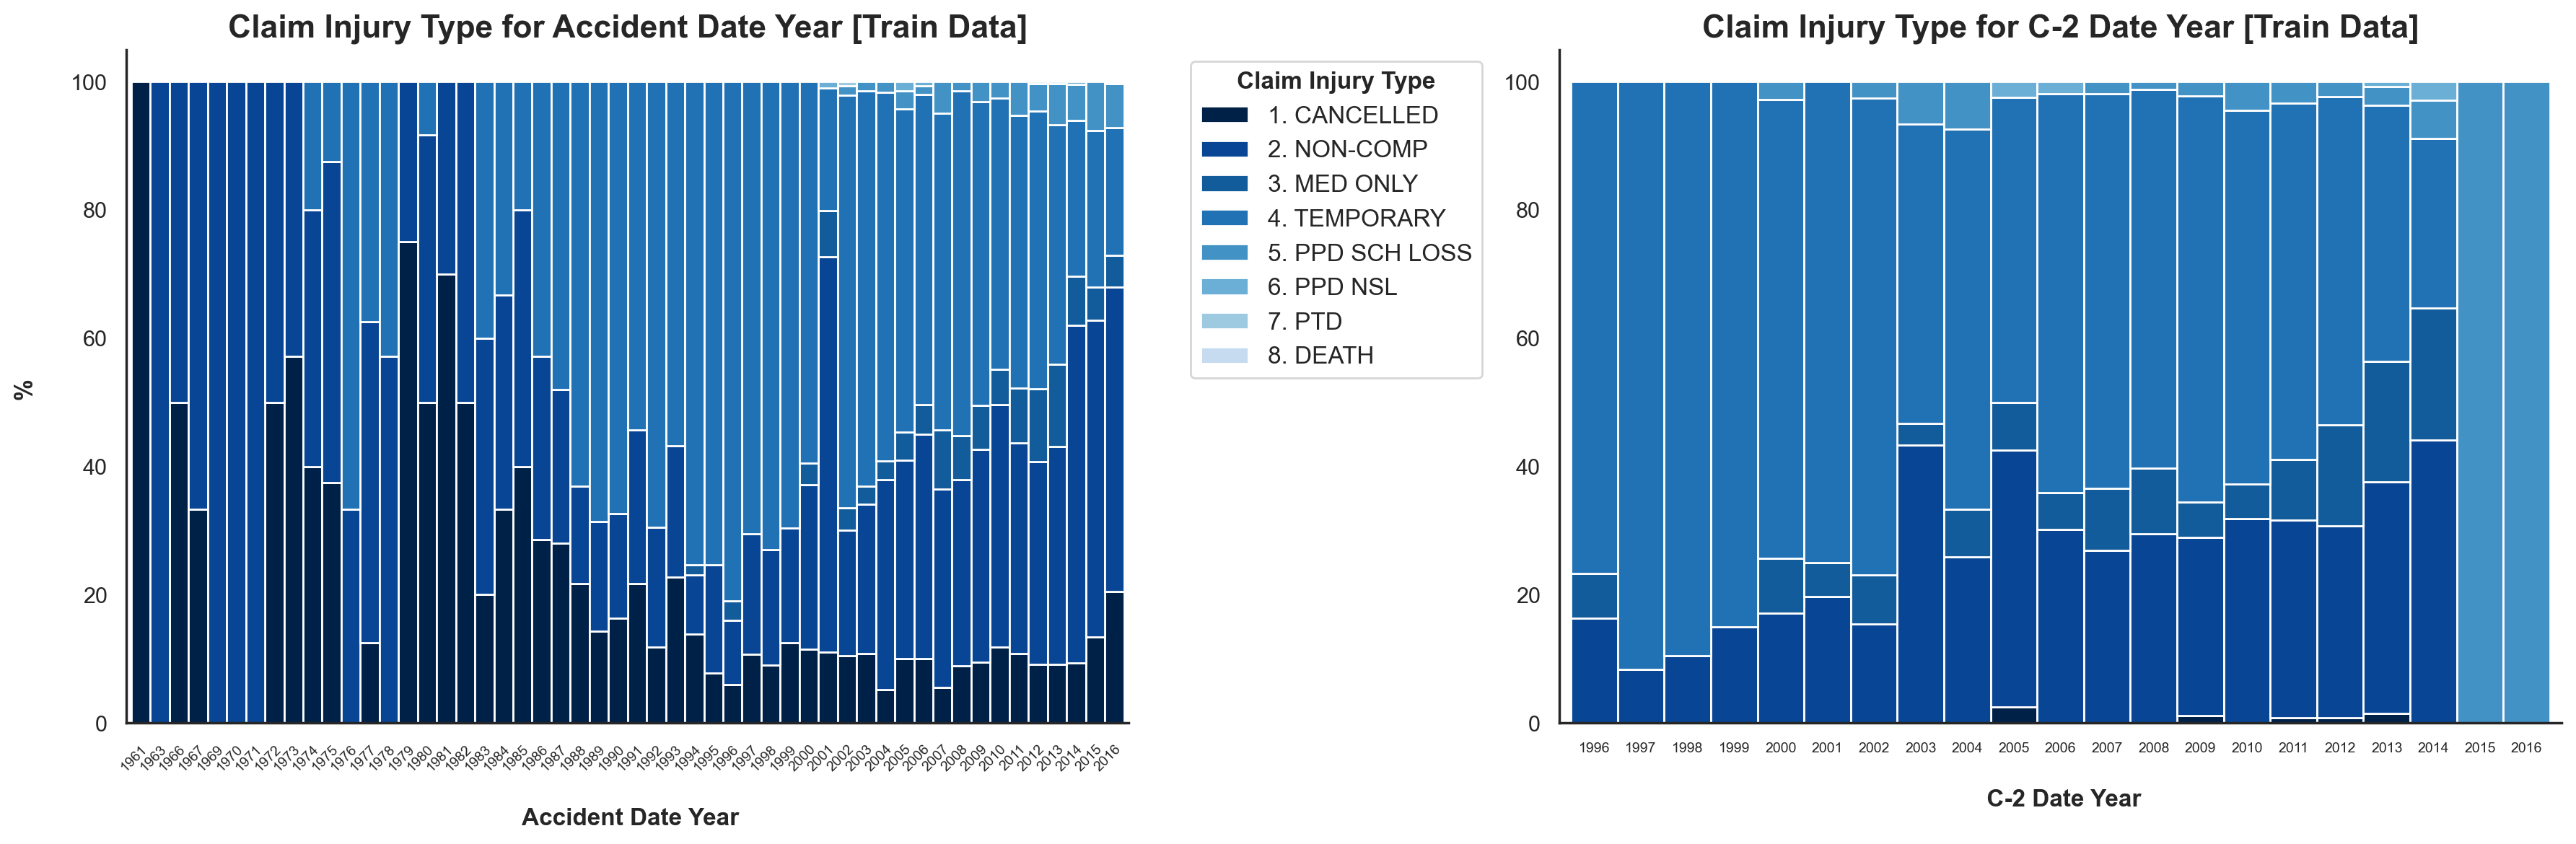

In [25]:
# Check the Bar Stacked Plot for 'Claim Injury Type' for 'Accident Date Year' and 'C-2 Date Year' (outliers) [Train Data]
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Train Data - 'Accident Date Year'
accident_date_year_outliers = train_data[(train_data['Accident Date Year'] < outliers_info.loc['Accident Date Year', 'Lower Bound']) 
                                      | (train_data['Accident Date Year'] > outliers_info.loc['Accident Date Year', 'Upper Bound'])]

accident_date_year_outliers_gb = accident_date_year_outliers.groupby('Accident Date Year')['Claim Injury Type'].value_counts(normalize=True).unstack() * 100
accident_date_year_outliers_gb.index = accident_date_year_outliers_gb.index.astype('int64')
accident_date_year_outliers_gb.plot(kind='bar', stacked=True, ax=ax[0], color=claim_injury_type_palette, width=1)
ax[0].set_title('Claim Injury Type for Accident Date Year [Train Data]', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\n Accident Date Year', fontsize=12, fontweight='bold')
ax[0].set_ylabel('% \n', fontsize=12, fontweight='bold')
ax[0].legend(title='Claim Injury Type', fontsize='12', title_fontproperties={'weight': 'bold', 'size': 12}, bbox_to_anchor=(1.05, 1))
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=7)

# Train Data - 'C-2 Date Year'
c_2_date_year_outliers = train_data[(train_data['C-2 Date Year'] < outliers_info.loc['C-2 Date Year', 'Lower Bound']) 
                                      | (train_data['C-2 Date Year'] > outliers_info.loc['C-2 Date Year', 'Upper Bound'])]

c_2_date_year_outliers_gb = c_2_date_year_outliers.groupby('C-2 Date Year')['Claim Injury Type'].value_counts(normalize=True).unstack() * 100
c_2_date_year_outliers_gb.index = c_2_date_year_outliers_gb.index.astype('int64')
c_2_date_year_outliers_gb.plot(kind='bar', stacked=True, ax=ax[1], color=claim_injury_type_palette, width=1)
ax[1].set_title('Claim Injury Type for C-2 Date Year [Train Data]', fontsize=16, fontweight='bold')
ax[1].set_xlabel('\n C-2 Date Year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('')
ax[1].legend([],[], frameon=False)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=0, ha='center', rotation_mode='anchor', fontsize=7)


sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

> After analyzing the variables, we decided to **Keep** the outliers in the dataset, as they are important for the model to learn the patterns of the data and not to lose information.

In [26]:
# Drop the 'Accident Date Year_Log' and 'C-2 Date Year_Log' columns
X_train = X_train.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])
X_val = X_val.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])
test_data = test_data.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])

---

#### **2 | Handling Missing Values** <a class='anchor' id='2-missing-values'></a>

**`Industry Code`**
   - **Chosen Strategy**: Replace with **NaN** (new category)
   - **Reasoning**: For categorical variables like "Industry Code," we decided to replace missing values with a new category (NaN). This approach allows the model to learn from the absence of data, which can be informative in itself. This approach avoids losing information and is simple to implement.
  
**`Accident Date Day, Month, Weekday, Year`** & **`C-2 Date Day, Month, Weekday, Year`** & **`Age at Injury Clean`**
   - **Chosen Strategy**: **KNN Imputation**
   - **Reasoning**: Since we were already using the **KNN Imputer** for imputing values in the `C-2 Date` column—an approach that calculates distances between samples to estimate missing values—we extended the same algorithm to handle missing data in the other columns as well. This choice ensures consistency across the dataset and provides more accurate imputations compared to simpler methods like using measures of central tendency (e.g., mean or median).

**`Age at Injury Grups`**
   - **Chosen Strategy**: Will be treated like a new category, so we will not need to impute the missing values.

---

In [27]:
# Check how many missing values are left in both training and validation sets
NAs_df = pd.DataFrame({
    'n train': X_train.isnull().sum(),
    '% train': round(X_train.isnull().mean()*100, 2),
    'n val': X_val.isnull().sum(),
    '% val': round(X_val.isnull().mean()*100, 2),
    'n test': test_data.isnull().sum(),
    '% test': round(test_data.isnull().mean()*100, 2)
})
NAs_df[NAs_df['% train'] > 0].sort_index(ascending = True)

,n train,% train,n val,% val,n test,% test
Accident Date Day,2712,0.63,977,0.68,2444,0.63
Accident Date Month,2712,0.63,977,0.68,2444,0.63
Accident Date Weekday,2712,0.63,977,0.68,2444,0.63
Accident Date Year,2712,0.63,977,0.68,2444,0.63
Age at Injury Clean,1633,0.38,553,0.39,982,0.25
C-2 Date Day,10903,2.53,3657,2.55,9134,2.35
C-2 Date Month,10903,2.53,3657,2.55,9134,2.35
C-2 Date Weekday,10903,2.53,3657,2.55,9134,2.35
C-2 Date Year,10903,2.53,3657,2.55,9134,2.35
Industry Code Description,7454,1.73,2504,1.74,7736,1.99


In [28]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
       'Industry Code Description'],
      dtype='object')

##### **Categorical Variables Approach** <a class='anchor' id='categorical-variables-aproach'></a>

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.

In [29]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
       'Industry Code Description'],
      dtype='object')

In [30]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
X_train.select_dtypes(include = 'object').columns[X_train.select_dtypes(include = 'object').isnull().any()]

Index(['Industry Code Description'], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [31]:
# Transform the NaN values to 'Unknown' for the columns that have missing values and are 'object' type
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna('Unknown')
X_val['Industry Code Description'] = X_val['Industry Code Description'].fillna('Unknown')
test_data['Industry Code Description'] = test_data['Industry Code Description'].fillna('Unknown')

---

In [32]:
# Check descriptive statistics of the columns with NAs
X_train[X_train.columns[X_train.isnull().sum()>0]].describe().T

,count,mean,std,min,25%,50%,75%,max
Accident Date Day,427807.0,15.526653,8.777784,1.0,8.0,15.0,23.0,31.0
Accident Date Month,427807.0,6.492689,3.467180,1.0,3.0,7.0,9.0,12.0
Accident Date Weekday,427807.0,2.501574,1.813639,0.0,1.0,2.0,4.0,6.0
Accident Date Year,427807.0,2020.826826,1.863070,1961.0,2020.0,2021.0,2022.0,2023.0
Age at Injury Clean,428886.0,42.585032,13.746412,1.0,31.0,42.0,54.0,122.0
C-2 Date Day,419616.0,15.669410,8.708929,1.0,8.0,16.0,23.0,31.0
C-2 Date Month,419616.0,6.477596,3.448747,1.0,3.0,7.0,9.0,12.0
C-2 Date Weekday,419616.0,2.147997,1.473333,0.0,1.0,2.0,3.0,6.0
C-2 Date Year,419616.0,2021.044064,1.083079,1996.0,2020.0,2021.0,2022.0,2024.0


##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>** <a class='anchor' id='knn-imputer'></a>

- **KNN Imputer** is a more sophisticated imputation method that leverages the similarity between samples to estimate missing values. It is particularly useful for continuous variables with complex relationships that can be captured by the nearest neighbors.
  - In this case, we will use the **`KNNImputer`** for all variables that have missing values.

In [33]:
# Check the columns of the training set (X_train) that have missing values
print('\033[1mNumber of missing values in the training set:\033[0m')
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
X_train.columns[X_train.isnull().sum()>0]

Number of missing values in the training set:
Accident Date Day         2712
Accident Date Month       2712
Accident Date Weekday     2712
Accident Date Year        2712
Age at Injury Clean       1633
C-2 Date Day             10903
C-2 Date Month           10903
C-2 Date Weekday         10903
C-2 Date Year            10903
dtype: int64


Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year'],
      dtype='object')

In [34]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
X_train_knn_imputed = X_train.copy(deep=True)                                  # deep=True to avoid the SettingWithCopyWarning
X_train_knn_imputed_n = X_train_knn_imputed[numerical_columns]                 # Numerical columns

# List of columns to be imputed
columns_to_impute = ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 
                     'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
                     'Age at Injury Clean']

# Init the transformer
knn_imp = KNNImputer()                                                         # k=5 is the default 

# Since KNN Imputer is sensitive to the scale of the data, we need to scale the data before applying the imputer
scaler = StandardScaler()
scaler.fit(X_train_knn_imputed_n)                                              # Fit the scaler to the training data
X_train_knn_imputed_n.loc[:,:] = scaler.transform(X_train_knn_imputed_n)       # Transform the training data

# Fit/transform
knn_imp.fit(X_train_knn_imputed_n)                                             # Fit the imputer to the training data
X_train_knn_imputed_n.loc[:,:] = knn_imp.transform(X_train_knn_imputed_n)      # Transform the training data

## Time of Execution KNNImputer: 10m 1.1s

In [35]:
# Reverse the scaling
X_train_knn_imputed_n.loc[:,:] = scaler.inverse_transform(X_train_knn_imputed_n) # Inverse transform the training data

In [36]:
# Check the columns of the training set (X_train) that have missing values
X_train_knn_imputed_n.columns[X_train_knn_imputed_n.isnull().sum()>0]        # Perfect!

Index([], dtype='object')

In [37]:
# Check the results of the KNNImputer - rows with missing values
X_train_knn_imputed_n[X_train.isnull().any(axis=1)][X_train.columns[X_train.isnull().sum()>0]]

,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year
Claim Identifier,,,,,,,,,
5609592,12.2,10.0,3.4,2020.0,42.0,9.0,12.0,2.0,2020.0
5633459,10.0,12.0,3.0,2020.0,57.0,12.4,2.2,1.0,2021.0
5698305,2.0,12.0,0.0,2019.0,61.0,20.2,6.2,2.4,2021.0
5405393,22.0,7.0,0.0,2019.0,33.0,16.2,1.8,3.8,2020.0
5734219,6.0,3.0,5.0,2021.0,53.0,9.8,4.4,1.4,2021.0
...,...,...,...,...,...,...,...,...,...
5632383,14.0,12.0,0.0,2020.0,57.0,11.4,1.2,2.4,2021.0
5963171,21.0,3.0,0.0,2022.0,38.0,11.0,5.2,3.0,2022.0
5633376,20.0,12.0,6.0,2020.0,42.6,6.0,1.0,2.0,2021.0


In [38]:
# Check if the rows changed are the same that have missing values
len(X_train_knn_imputed_n[X_train.isnull().any(axis=1)].index == X_train[X_train.isnull().any(axis=1)].index)	# Perfect!

13125

In [39]:
# Check how many values have decimals
(X_train_knn_imputed_n[columns_to_impute] % 1 != 0).sum()[(X_train_knn_imputed_n % 1 != 0).sum() > 0]

Accident Date Year        1335
Accident Date Month      40348
Accident Date Day        16284
Accident Date Weekday     2230
C-2 Date Day             22203
C-2 Date Month           45679
C-2 Date Weekday          8345
C-2 Date Year             2354
Age at Injury Clean       1362
dtype: int64

> To maintain consistency across the dataset, we will round the imputed values to the nearest integer. This ensures that the imputed values align with the original data's discrete nature, avoiding fractional values that could introduce noise. 

In [40]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed[numerical_columns]
X_val_knn_imputed_n.loc[:,:] = scaler.transform(X_val_knn_imputed_n)
X_val_knn_imputed_n.loc[:,:] = knn_imp.transform(X_val_knn_imputed_n)
X_val_knn_imputed_n.loc[:,:] = scaler.inverse_transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed[numerical_columns]
test_data_knn_imputed_n.loc[:,:] = scaler.transform(test_data_knn_imputed_n)
test_data_knn_imputed_n.loc[:,:] = knn_imp.transform(test_data_knn_imputed_n)
test_data_knn_imputed_n.loc[:,:] = scaler.inverse_transform(test_data_knn_imputed_n)

#### TimeExecution: 11m 28.3s

In [41]:
# Round the values of the columns that have been imputed
X_train_knn_imputed_n.loc[:, columns_to_impute] = X_train_knn_imputed_n.loc[:, columns_to_impute].round()
X_val_knn_imputed_n.loc[:, columns_to_impute] = X_val_knn_imputed_n.loc[:, columns_to_impute].round()
test_data_knn_imputed_n.loc[:, columns_to_impute] = test_data_knn_imputed_n.loc[:, columns_to_impute].round()

In [42]:
# Check how many values have decimals
(X_train_knn_imputed_n[columns_to_impute] % 1 != 0).sum()[(X_train_knn_imputed_n % 1 != 0).sum() > 0] # Perfect!

Series([], dtype: int64)

In [43]:
# Replace only the specified columns with the imputed values
X_train[columns_to_impute] = X_train_knn_imputed_n[columns_to_impute]
X_val[columns_to_impute] = X_val_knn_imputed_n[columns_to_impute]
test_data[columns_to_impute] = test_data_knn_imputed_n[columns_to_impute]

In [44]:
# Check the data types of the training set
# X_train.dtypes

In [45]:
# Transform the imputed columns to 'int64' type
for col in columns_to_impute:
    X_train[col] = X_train[col].astype('int64')
    X_val[col] = X_val[col].astype('int64')
    test_data[col] = test_data[col].astype('int64')

---

#### **3 | Encoding** <a class='anchor' id='3-encoding'></a>

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br>

<div style="max-width:750px; display: block; margin: 0 auto;">

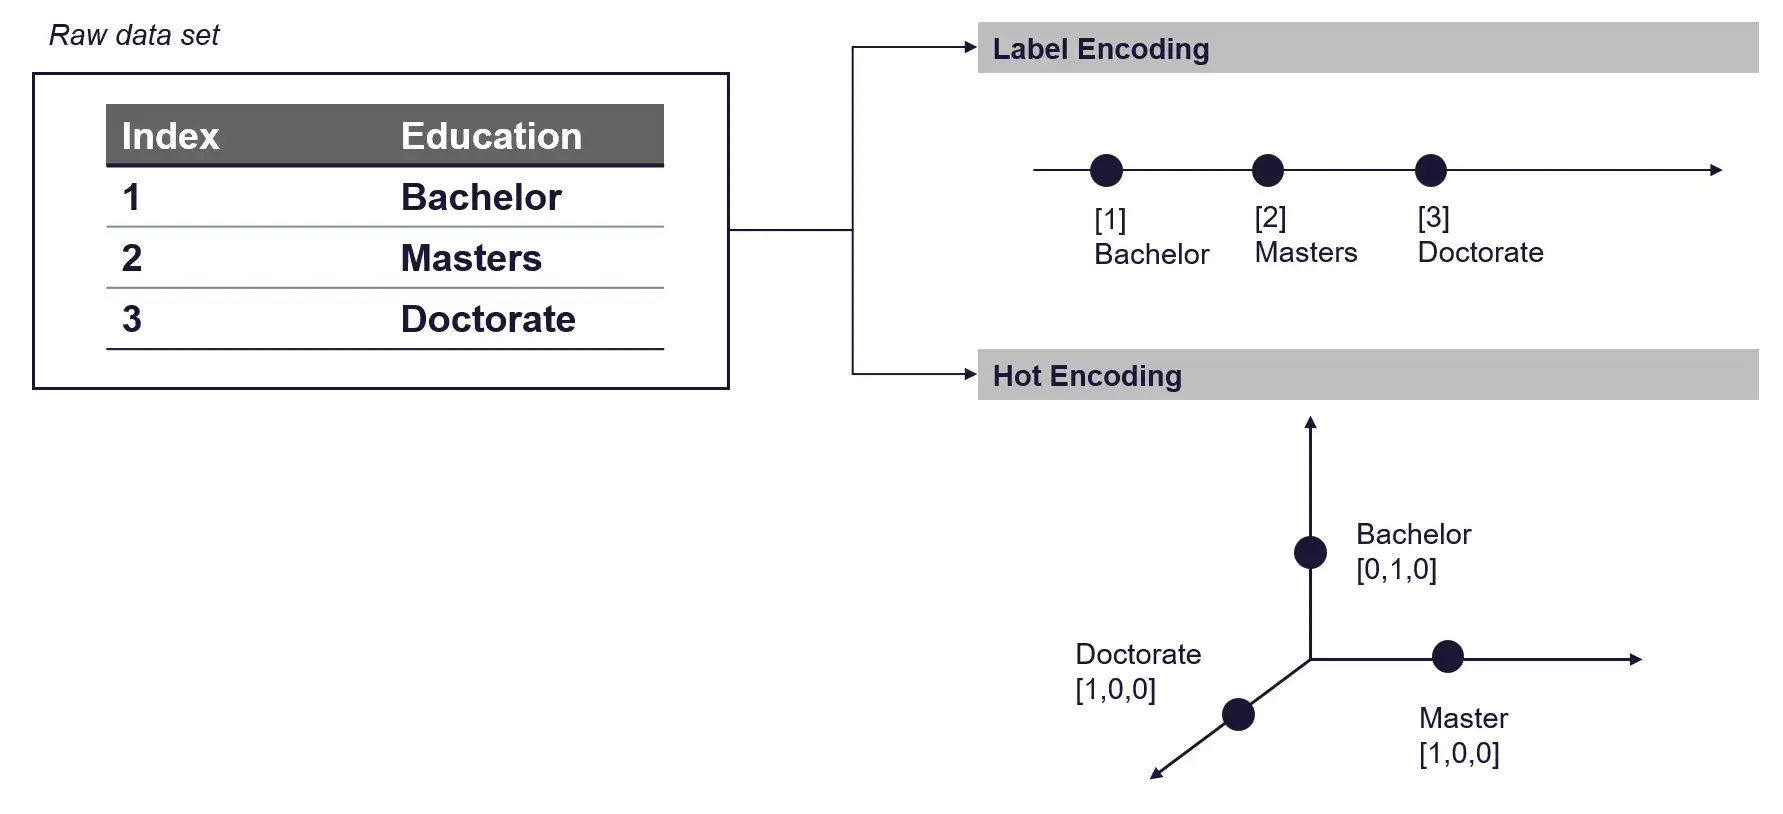
    
</div>

<center><b>Figure 1 | </b> Example of Encoding Techniques.</center> <br>


---

##### **Label/Ordinal Encoding** <sup>[**[2]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) </sup> <a class='anchor' id='label-ordinal-encoding'></a>

- **Label/Ordinal encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding** <sup>[**[3]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)</sup> <a class='anchor' id='one-hot-encoding'></a>

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

---

##### **Target Encoding**

In [46]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, 
                          "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, 
                          "7. PTD": 7, "8. DEATH": 8}

In [47]:
# Encode the target variable only if not already encoded
if y_train.dtype == 'object':
    y_train_encoded = y_train.map(claim_injury_type_dict)
    y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

,Original,Encoded
Claim Identifier,,
6094685,2. NON-COMP,2
5535751,4. TEMPORARY,4
5715773,2. NON-COMP,2
5765474,4. TEMPORARY,4
6130855,2. NON-COMP,2
...,...,...
5614897,2. NON-COMP,2
5994552,4. TEMPORARY,4
5659309,4. TEMPORARY,4


In [48]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

In [49]:
# Check the 'object' columns of the training set (X_train) = Columns to be encoded
print('\033[1mColumns to be encoded:\033[0m [',len(X_train.select_dtypes(include = 'object').columns), ']')
sorted(X_train.select_dtypes(include = 'object').columns)

Columns to be encoded: [ 13 ]


['Age at Injury Group',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Carrier Type Bucket',
 'County of Injury',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Bucket',
 'WCIO Nature of Injury Bucket',
 'WCIO Part of Body Bucket']

In [50]:
# Check the columns of the training set (X_train) that already have been encoded/are in right format categorical_columns - select_dtypes(include = 'object')
print('\033[1mColumns that are already in right format:\033[0m [',
    len(set(categorical_columns).difference(X_train.select_dtypes(include='object').columns)), ']' + '\n',
    set(categorical_columns).difference(X_train.select_dtypes(include='object').columns))

Columns that are already in right format: [ 10 ]
 {'Accident Date Binary', 'C-2 Date Binary', 'Weekly Wage Reported', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'First Hearing Date Binary', 'Carrier Type', 'IME-4 Reported', 'C-3 Date Binary'}



##### 🎛️ **Encoding Justification**

<style>
.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
    color: #e0e0e0;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">


| **Variable \ Encoding**                | **Encoding Method**     | **Justification**                                                         |
|:--------------------------------------:|:-----------------------:|:-------------------------------------------------------------------------:|
| **Age at Injury Group**                | Ordinal Encoding        | The variable has an ordinal relationship.                                 |
| **Alternative Dispute Resolution**     | One-Hot Encoding        | Binary categorical variable  + `Unknown` category.                        |
| **Attorney/Representative**            | One-Hot Encoding        | Binary categorical variable                                               |
| **COVID-19 Indicator**                 | One-Hot Encoding        | Binary categorical variable                                               |
| **Carrier Type**                       | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Carrier Type Bucket**                | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **County of Injury**                   | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **District Name**                      | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Gender**                             | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Industry Code Description**          | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Medical Fee Region**                 | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Cause of Injury Bucket**        | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Cause of Injury Description**   | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Nature of Injury Bucket**       | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Nature of Injury Description**  | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Part of Body Bucket**           | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **WCIO Part of Body Description**      | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |

</div>

In [51]:
## for more details check:
# ?OrdinalEncoder

In [52]:
## for more details check:
# ?OneHotEncoder

In [53]:
columns_to_OrdinalEncode = ['Age at Injury Group']

columns_to_OneHotEncode = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator',
                           'Carrier Type Bucket', 'County of Injury', 'District Name', 
                           'Gender', 'Industry Code Description', 'Medical Fee Region',
                           'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket', 'WCIO Part of Body Bucket'
                           
                           #  Drop  the columns that have been encoded
                           # 'Carrier Type', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 
]

In [54]:
################### First Approach: Label Encoding [Manually] ###################
# Transform the 'Age at Injury Group' column to ordinal numbers [0 (Unknown)- 6(100+)]
age_at_injury_group_dict = {'Unknown': 0, '0-20': 1, '21-40': 2, '41-60': 3, '61-80': 4, '81-100': 5, '+100': 6}

if X_train['Age at Injury Group'].dtype == 'object' and X_val['Age at Injury Group'].dtype == 'object' and test_data['Age at Injury Group'].dtype == 'object':
    X_train['Age at Injury Group'] = X_train['Age at Injury Group'].map(age_at_injury_group_dict)
    X_val['Age at Injury Group'] = X_val['Age at Injury Group'].map(age_at_injury_group_dict)
    test_data['Age at Injury Group'] = test_data['Age at Injury Group'].map(age_at_injury_group_dict)

In [55]:
# Check if the transformation is correct
X_train['Age at Injury Group'].isnull().sum(), X_val['Age at Injury Group'].isnull().sum(), test_data['Age at Injury Group'].isnull().sum()

(0, 0, 0)

In [56]:
# Check the 'Age at Injury Group' column of the training set (X_train) after the manual encoding
pd.DataFrame(X_train['Age at Injury Group'].value_counts()).rename(columns={'count': 'Frequency'}).sort_index()

,Frequency
Age at Injury Group,
0,1633
1,8770
2,181574
3,185906
4,51795
5,737
6,104


In [57]:
################### Second Approach: One-Hot Encoding [Dummy's] ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Function to change the name of the columns 
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop ="first")                               # drop ='first' to fix the dummy variable trap (n-1)

# Fit the one_hot_encoder on the specified columns
one_hot_encoder.fit(pd.concat([X_train_ohe, X_val_ohe, test_data_ohe], axis=0)[columns_to_OneHotEncode])

# Transform the specified columns in the training data
X_train_ohe_values = one_hot_encoder.transform(X_train_ohe[columns_to_OneHotEncode])
X_train_ohe_values_df = pd.DataFrame(X_train_ohe_values, 
                                     columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                     index=X_train_ohe.index)
X_train_ohe = pd.concat([X_train_ohe.drop(columns=columns_to_OneHotEncode), X_train_ohe_values_df], axis=1)

# Transform the specified columns in the validation data
X_val_ohe_values = one_hot_encoder.transform(X_val_ohe[columns_to_OneHotEncode])
X_val_ohe_values_df = pd.DataFrame(X_val_ohe_values, 
                                   columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                   index=X_val_ohe.index)
X_val_ohe = pd.concat([X_val_ohe.drop(columns=columns_to_OneHotEncode), X_val_ohe_values_df], axis=1)

# Transform the specified columns in the test data
test_data_ohe_values = one_hot_encoder.transform(test_data_ohe[columns_to_OneHotEncode])
test_data_ohe_values_df = pd.DataFrame(test_data_ohe_values, 
                                       columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                       index=test_data_ohe.index)
test_data_ohe = pd.concat([test_data_ohe.drop(columns=columns_to_OneHotEncode), test_data_ohe_values_df], axis=1)

In [58]:
# Check the one-hot encoded columns of the training set (X_train_ohe)
pd.concat([X_train[columns_to_OneHotEncode],                                              # Original columns
           X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]],  # Encoded columns
          axis=1, keys=["Original", "Encoded"]).drop_duplicates().head(2)                 # Assigning names to the two levels and show only unique rows

Original                          \
                 Alternative Dispute Resolution Attorney/Representative   
Claim Identifier                                                          
6094685                                       N                       N   
5535751                                       N                       Y   

                                                                          \
                 COVID-19 Indicator Carrier Type Bucket County of Injury   
Claim Identifier                                                           
6094685                           N         1A. PRIVATE       CHAUTAUQUA   
5535751                           N         1A. PRIVATE            KINGS   

                                       \
                 District Name Gender   
Claim Identifier                        
6094685                BUFFALO      F   
5535751                    NYC      F   

                                                                     \
                                          Industry Code Description   
Claim Identifier                                                      
6094685           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...   
5535751                           HEALTH CARE AND SOCIAL ASSISTANCE   

                                                                 \
                 Medical Fee Region WCIO Cause of Injury Bucket   
Claim Identifier                                                  
6094685                           I                    4 - Fall   
5535751                          IV                  8 - Struck   

                                                                        \
                 WCIO Nature of Injury Bucket WCIO Part of Body Bucket   
Claim Identifier                                                         
6094685                          1 - Specific    V - Lower Extremities   
5535751                          1 - Specific                II - Neck   

                                          Encoded  \
                 Alternative Dispute Resolution_U   
Claim Identifier                                    
6094685                                       0.0   
5535751                                       0.0   

                                                                             \
                 Alternative Dispute Resolution_Y Attorney/Representative_Y   
Claim Identifier                                                              
6094685                                       0.0                       0.0   
5535751                                       0.0                       1.0   

                                                                       \
                 COVID-19 Indicator_Y Carrier Type Bucket_1A. PRIVATE   
Claim Identifier                                                        
6094685                           0.0                             1.0   
5535751                           0.0                             1.0   

                                              \
                 Carrier Type Bucket_2A. SIF   
Claim Identifier                               
6094685                                  0.0   
5535751                                  0.0   

                                                      \
                 Carrier Type Bucket_3A. SELF PUBLIC   
Claim Identifier                                       
6094685                                          0.0   
5535751                                          0.0   

                                                       \
                 Carrier Type Bucket_4A. SELF PRIVATE   
Claim Identifier                                        
6094685                                           0.0   
5535751                                           0.0   

                                                          \
                 Carrier Type Bucket_5A-5C. SPECIAL FUND   
Claim Identifier                                         

In [59]:
# Transform columns_to_OneHotEncode to 'int32' type [Just to be more easy to identify the binary columns]
X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')
X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')
test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')

> **One-Hot Encoding** cannot be applied to the **`Claim Injury Type`** variable, since that is the target variable. That approach would make the problem **multi-label** and not a **multi-class** problem, which is the case in this project.

> If we were to apply **One-Hot Encoding** to the target variable, we would have to create a separate model for each class, which would make the problem much more complex for the model and would very likely lead to lower performance, or it would require much more data in order to reach the same performance as regular classification.<sup>[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)</sup>

In [60]:
# Merge the dataframes with the encoded columns- drop  the original columns & keep the encoded columns
X_train = pd.concat([X_train.drop(columns = columns_to_OneHotEncode), X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)
X_train = X_train[sorted(X_train.columns)]   # Sort the columns alphabetically

X_val = pd.concat([X_val.drop(columns = columns_to_OneHotEncode), X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)
X_val = X_val[sorted(X_val.columns)]

test_data = pd.concat([test_data.drop(columns = columns_to_OneHotEncode), test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)
test_data = test_data[sorted(test_data.columns)]

In [61]:
# Check the shape of the Training, Validation and Test Data
X_train.shape, X_val.shape, test_data.shape # Perfect!

((430519, 145), (143507, 145), (387975, 145))

In [62]:
X_train.head()

,Accident Date Binary,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,Age at Injury Group,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Assembly Date Day,Assembly Date Month,Assembly Date Weekday,Assembly Date Year,Attorney/Representative_Y,C-2 Date Binary,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year,C-3 Date Binary,COVID-19 Indicator_Y,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,First Hearing Date Binary,Gender_M,Gender_U,Gender_X,IME-4 Reported,Industry Code Description_ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,"Industry Code Description_AGRICULTURE, FORESTRY, FISHING AND HUNTING","Industry Code Description_ARTS, ENTERTAINMENT, AND RECREATION",Industry Code Description_CONSTRUCTION,Industry Code Description_EDUCATIONAL SERVICES,Industry Code Description_FINANCE AND INSURANCE,Industry Code Description_HEALTH CARE AND SOCIAL ASSISTANCE,Industry Code Description_INFORMATION,Industry Code Description_MANAGEMENT OF COMPANIES AND ENTERPRISES,Industry Code Description_MANUFACTURING,Industry Code Description_MINING,Industry Code Description_OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),"Industry Code Description_PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",Industry Code Description_PUBLIC ADMINISTRATION,Industry Code Description_REAL ESTATE AND RENTAL AND LEASING,Industry Code Description_RETAIL TRADE,Industry Code Description_TRANSPORTATION AND WAREHOUSING,Industry Code Description_UTILITIES,Industry Code Description_Unknown,Industry Code Description_WHOLESALE TRADE,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Number of Dependents,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1

---

#### **4 | Multicollinearity** <a class='anchor' id='4-multicollinearity'></a>


##### **Variance Inflation Factor (VIF)** <sup>[**[4]**](https://www.statisticshowto.com/variance-inflation-factor/)</sup> <a class='anchor' id='variance-inflation-factor-vif'></a> <sup>[**[5]**](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)</sup>

- **VIF** is a measure of multicollinearity among predictor variables within a multiple regression.
- **VIF** estimates how much the variance of a regression coefficient is increased due to multicollinearity in the model.

The formula for **VIF** is:

$$VIF = \frac{1}{1 - R^2}$$

Where $R^2$ is the coefficient of determination in a regression model where the predictor variable is regressed against all other predictor variables.

- **VIF** values are always greater than or equal to $1$.
- If **VIF** is equal to $1$, then there is no correlation among the predictor variables.
- If **VIF** is greater than $1$, then the predictors are correlated with other variables in the model.
- The general rule of thumb is that if **VIF** is greater than $10$, then multicollinearity is high and the predictors are highly correlated.
- In this case, the predictors should be removed from the model.

<br>

> In other words, **Variance Inflation Factor (VIF)** measures how much the variance of a coefficient is inflated due to multicollinearity with other independent variables. The square root of the VIF for a given variable indicates how much larger its standard deviation is compared to a scenario where that variable is not correlated with any other independent variable. If there is no correlation between variables, the VIF values are close to 1.


In [63]:
### Use VIF to analyse multicollinearity

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Compute the VIF for numerical columns
# Features to consider removing (VIF >5)
compute_vif(X_train[numerical_columns]).sort_values('VIF', ascending=False)

,Variable,VIF
6,Assembly Date Month,9.621008
10,C-2 Date Month,9.064134
9,C-2 Date Day,3.180342
5,Assembly Date Day,3.175840
12,C-2 Date Year,2.737761
8,Assembly Date Year,2.284527
1,Accident Date Month,1.979987
11,C-2 Date Weekday,1.591657
7,Assembly Date Weekday,1.590008
3,Accident Date Year,1.514855


##### **Multicollinearity Analysis | Notes**

- **Assembly Date Month** ($VIF \approx 9.62$) and **C-2 Date Month** ($VIF \approx 9.06$)
  - These variables show high multicollinearity, which is expected given their close relationship. Both variables represent different dates related to the injury, leading to inherent correlations.
- Many features (e.g., **Accident Date Weekday**, **Accident Date Day**, and **Age at Injury Clean**), have VIF values close to $1$, indicating minimal multicollinearity.

In [64]:
# See results without 'Assembly Date Month'
compute_vif(X_train[numerical_columns].drop(columns = ['Assembly Date Month'])).sort_values('VIF', ascending=False)

# Of course, we will discard one of other redundant columns in the next steps

,Variable,VIF
8,C-2 Date Day,3.179368
5,Assembly Date Day,3.174428
11,C-2 Date Year,2.695944
7,Assembly Date Year,2.253483
9,C-2 Date Month,1.854468
1,Accident Date Month,1.852863
10,C-2 Date Weekday,1.590843
6,Assembly Date Weekday,1.589358
3,Accident Date Year,1.514850
2,Accident Date Weekday,1.004807


---

## **💾 Save Data**

In [65]:
# To avoid run the code above, we can save the training, validation and test data after feature engineering 
# Save the data
X_train.to_parquet('data/2ndNotebook/X_train.parquet', engine = 'fastparquet')
X_val.to_parquet('data/2ndNotebook/X_val.parquet', engine = 'fastparquet')
test_data.to_parquet('data/2ndNotebook/test_data.parquet', engine = 'fastparquet')

# Save the target variable (Series cannot be saved in parquet format - Convert to DataFrame)
y_train.to_frame().to_parquet('data/2ndNotebook/y_train.parquet', engine = 'fastparquet')
y_val.to_frame().to_parquet('data/2ndNotebook/y_val.parquet', engine = 'fastparquet')

---

> For time efficiency, we will use the dataset after the **Feature Engineering** process in **Feature Selection** techniques.

# **🎚️ Feature Selection** 

In [66]:
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet').squeeze()


# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features)
print(X_train.shape, X_val.shape, test_data.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)

(430519, 145) (143507, 145) (387975, 145)

 (430519,) (143507,)


In [67]:
# # Check the unique values of each column
# for col in X_train.columns:
#     unique_values = sorted(X_train[col].unique(), key=lambda x: (str(type(x)), x))
#     # print(f"\033[1m{col}\033[0m [{X_train[col].nunique()}]")
#     print(f'\033[1m{col}\033[0m [{X_train[col].nunique()}]: {unique_values}') # Perfect!

In [68]:
# # Check the data types of the training set
# pd.DataFrame({'Data Type': X_train.dtypes}).sort_index()

In [69]:
# Update the data types of the column 'Age at Injury Group' to 'int32'
X_train['Age at Injury Group'] = X_train['Age at Injury Group'].astype('int32')
X_val['Age at Injury Group'] = X_val['Age at Injury Group'].astype('int32')
test_data['Age at Injury Group'] = test_data['Age at Injury Group'].astype('int32')

In [70]:
# Check the list of columns
# list(X_train.columns)

In [71]:
# Associate the data types ['int64' - Numerical and 'int32' - Binary -  Just to be more easy to identify the binary columns]
# Define binary and numerical columns
binary_columns = X_train.columns[(X_train.nunique() == 2)].sort_values()
ordinal_columns = ['Age at Injury Group']
numerical_columns = X_train.columns[(X_train.nunique() > 2) & (X_train.columns.isin(binary_columns) == False) & (X_train.columns.isin(ordinal_columns) == False)].sort_values()

print('\033[1mBinary Columns:\033[0m [', len(binary_columns), ']')
print(binary_columns)
print('\n\033[1mOrdinal Columns:\033[0m [', len(ordinal_columns), ']')
print(ordinal_columns)
print('\n\033[1mNumerical Columns:\033[0m [', len(numerical_columns), ']')
print(numerical_columns)

# Transform to list
binary_columns = list(binary_columns)
ordinal_columns = list(ordinal_columns)
numerical_columns = list(numerical_columns)

Binary Columns: [ 130 ]
Index(['Accident Date Binary', 'Alternative Dispute Resolution_U',
       'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y',
       'C-2 Date Binary', 'C-3 Date Binary', 'COVID-19 Indicator_Y',
       'Carrier Type Bucket_1A. PRIVATE', 'Carrier Type Bucket_2A. SIF',
       'Carrier Type Bucket_3A. SELF PUBLIC',
       ...
       'WCIO Nature of Injury Bucket_1 - Specific',
       'WCIO Nature of Injury Bucket_2 - Occupational/Cumulative',
       'WCIO Nature of Injury Bucket_3 - Multiple',
       'WCIO Part of Body Bucket_I - Head',
       'WCIO Part of Body Bucket_II - Neck',
       'WCIO Part of Body Bucket_III - Upper Extremities',
       'WCIO Part of Body Bucket_IV - Trunk',
       'WCIO Part of Body Bucket_V - Lower Extremities',
       'WCIO Part of Body Bucket_VI - Multiple Body Parts',
       'Weekly Wage Reported'],
      dtype='object', length=130)

Ordinal Columns: [ 1 ]
['Age at Injury Group']

Numerical Columns: [ 14 ]
Index(['Acciden

In [72]:
# Check if binary_columns + ordinal_columns + numerical_columns = all columns
len(X_train.columns) == len(binary_columns) + len(ordinal_columns) + len(numerical_columns)

True

In [73]:
# # Check the data types after the change
# pd.DataFrame({'Data Type': X_train.dtypes})

---

## **Filter Methods | Correlation between Variables**

<div style="max-width:750px; display: block; margin: 0 auto;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png">
</div>

<br>

- Correlation coefficient   ✅
- Chi-Square Test ✅ (with ETA Squared)

> On previous notebook, we have already done the **Filter Methods**, but we will do it again to check if the **Feature Engineering** process has changed the results.

#### **Numerical Variable VS Numerical Variable**

 > Compared to the **Pearson correlation** coefficient, the **Spearman correlation** is more robust to outliers and non-linear relationships. Therefore, we will use the Spearman correlation to calculate the correlation matrix of the numerical variables.

<br><br>

##### **Spearman's rho (ρ) <sup>[[6]](https://www.jstor.org/stable/1412159?origin=crossref)</sup>**
 (or Spearman rank correlation coefficient)

The formula for the Spearman rho can be written as:

\begin{equation*}
r_s=\frac{\sum_{i=1}^{n}\left(\left(R_{x_i}-{\bar{R}}_x\right)\times\left(R_{y_i}-{\bar{R}}_y\right)\right)}{\sqrt{SS_{R_x}\times SS_{R_y}}}
\end{equation*}

We'll disect this formula in parts.

First there is $\bar{R}_x$ and $\bar{R}_x$. These are the means of each of the two rank lists.

\begin{equation*}
{\bar{R}}_x=\ \frac{\sum_{i=1}^{n}R_{x_i}\ }{n},\ {\bar{R}}_y\ =\ \frac{\sum_{i=1}^{n}R_{y_i}\ }{n}
\end{equation*}

In these formulas $n$ is the number of pairs, $R_{x_i}$ is the i-th rank in ranks from x, and $R_{y_i}$ the i-th rank in the ranks from y.

<br><br>

##### **Interpretation of Spearman's rho**

- Spearman rho varies between $-1$ and $+1$.
    - If it is $-1$ there is a perfect negative monotonic relationship,
    - if it is $0$ there is no monotonic relationship
    - and at $+1$ there is a perfect positive monotonic relationship.

- Monotonic means that it is constantly increasing or constantly decreasing.

- A **positive** relation means that if one variable goes up, the other also goes up, a **negative** relation indicates if one goes down, the other goes up.

- To determine the strength we only look at the absolute value (which means to ignore any minus sign, so the absolute value of for example $-0.4$ is simply $0.4$).

Unfortunately there is no formal way to determine if for example 0.78 is high or low (although almost everyone would agree this is pretty high), and the rules of thumb floating around on the internet vary quite a lot, often depending on the field. For example the same rule of thumb from Rea and Parker (2014) **<sup>[[7]](https://books.google.pt/books/about/Designing_and_Conducting_Survey_Research.html?id=wmKVRDn5YGEC&redir_esc=y)</sup>**:

<center>

| \|ρ\|        | Interpretation    |
|--------------|-------------------|
| 0.00 < 0.10  | Negligible        |
| 0.10 < 0.20  | Weak              |
| 0.20 < 0.40  | Moderate          |
| 0.40 < 0.60  | Relatively strong |
| 0.60 < 0.80  | Strong            |
| 0.80 <= 1.00 | Very strong       |

</center>

In [74]:
# Correlation Matrix of the Numerical+Ordinal columns
cor_spearman = pd.concat([X_train[sorted(numerical_columns +     # Numerical Variables
                                         ordinal_columns)        # Ordinal Variable
                                  ], y_train                     # Target Variable
                          ], axis=1).corr(method='spearman').round(2)

# Set the display options
pd.set_option('display.max_rows', None)    # display all rows

def highlight_cells(val):
    if abs(val) >= 0.4:
        return 'background-color: rgba(10, 100, 160, 0.26);'
    return ''
cor_spearman.style.applymap(highlight_cells).format("{:.2f}")

,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,Age at Injury Group,Assembly Date Day,Assembly Date Month,Assembly Date Weekday,Assembly Date Year,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year,Number of Dependents,Claim Injury Type
Accident Date Day,1.00,0.00,-0.01,-0.02,-0.01,-0.01,0.03,0.01,0.00,-0.00,0.06,0.01,0.00,0.00,-0.00,0.00
Accident Date Month,0.00,1.00,-0.01,-0.07,-0.02,-0.02,0.01,0.69,-0.02,0.01,0.00,0.67,-0.01,0.02,-0.00,-0.02
Accident Date Weekday,-0.01,-0.01,1.00,-0.01,-0.04,-0.04,0.00,-0.00,-0.04,-0.01,-0.00,-0.00,-0.05,-0.01,0.00,-0.00
Accident Date Year,-0.02,-0.07,-0.01,1.00,-0.02,-0.02,0.01,0.10,-0.00,0.93,0.01,0.10,0.01,0.92,0.00,-0.04
Age at Injury Clean,-0.01,-0.02,-0.04,-0.02,1.00,0.91,-0.00,-0.01,0.00,-0.02,-0.00,-0.01,0.01,-0.02,0.00,0.10
Age at Injury Group,-0.01,-0.02,-0.04,-0.02,0.91,1.00,-0.00,-0.01,0.01,-0.01,-0.00,-0.01,0.01,-0.01,-0.00,0.09
Assembly Date Day,0.03,0.01,0.00,0.01,-0.00,-0.00,1.00,-0.00,0.00,-0.01,0.83,0.00,-0.01,-0.01,-0.00,-0.00
Assembly Date Month,0.01,0.69,-0.00,0.10,-0.01,-0.01,-0.00,1.00,-0.02,0.01,-0.00,0.94,-0.01,0.03,-0.00,-0.02
Assembly Date Weekday,0.00,-0.02,-0.04,-0.00,0.00,0.01,0.00,-0.02,1.00,-0.00,0.00,-0.02,0.64,-0.00,-0.00,0.00
Assembly Date Year,-0.00,0.01,-0.01,0.93,-0.02,-0.01,-0.01,0.01,-0.00,1.00,-0.01,0.02,0.01,0.98,0.00,-0.06


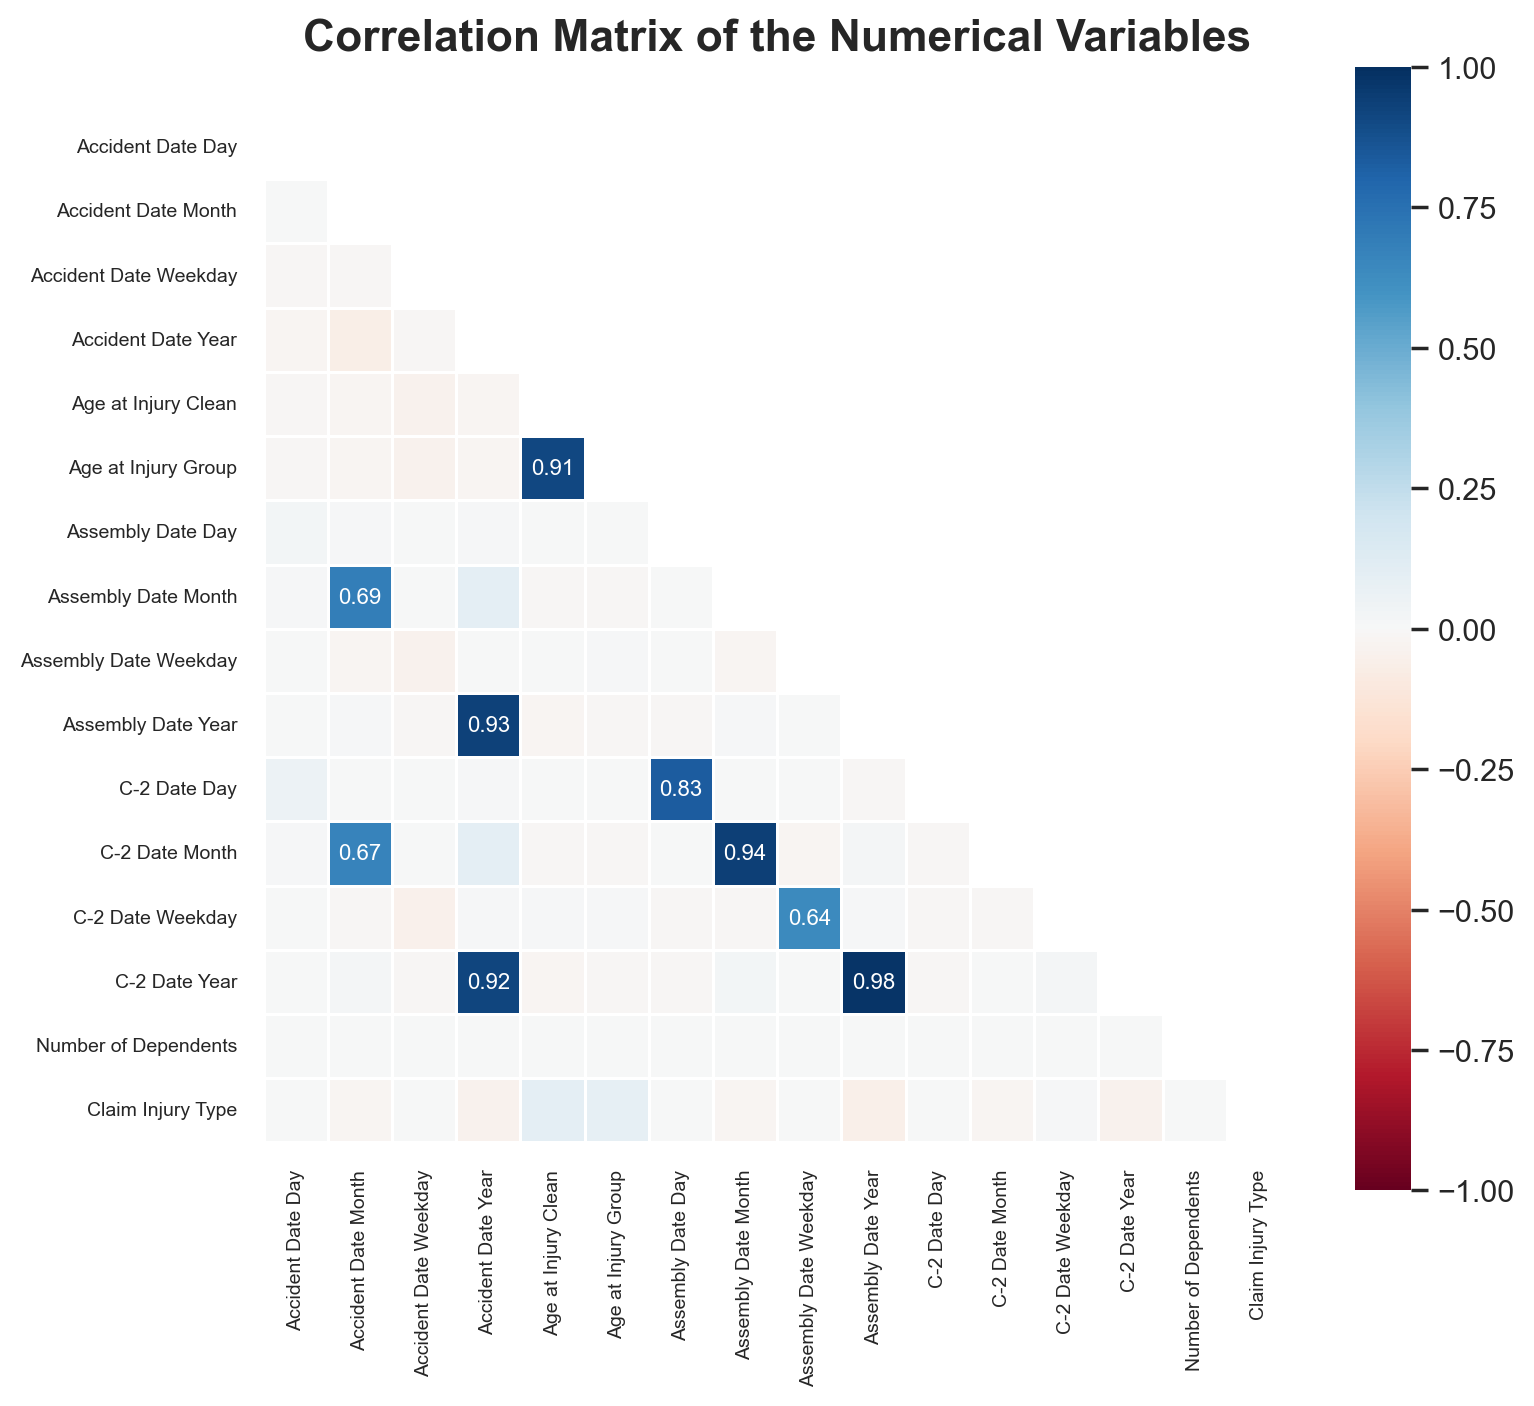

In [75]:
# ---------------------- Spearman Correlation [Heatmap] ----------------------
# Show only high or low values: values above |0.4| will appear annotated in the plot
mask_annot = np.absolute(cor_spearman.values) >= 0.4
annot = np.where(mask_annot, cor_spearman.values, np.full(cor_spearman.shape,""))

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor_spearman, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# # Create a custom diverging palette from red (-1) to white (0) to green (1)
# cmap = sns.diverging_palette(10, 130, s=100, l=50, n=9, center='light', as_cmap=True)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(8, 8))
sns.heatmap(cor_spearman,
            mask=mask,      # Hide the upper triangle
            cmap='RdBu',    # Colot Palette
            annot=annot,    # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':8}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('Correlation Matrix of the Numerical Variables\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Spearman_Correlation_Matrix_Numerical_AfterFeatureEngineering.png', dpi=300, bbox_inches='tight')
plt.show()

---

#### **Categorical Variable VS Categorical Variable**

> To calculate the correlation between two categorical variables, we will use the **Cramer's V correlation**.

<br><br>

##### **Cramer's V Correlation** <sup>**[[8]](http://fmatrm.if.usp.br/~aalves/FPE/hc_probability.pdf)**</sup>

Cramér's V (Cramér, 1946) is designed for the chi-square test for independence but can be adjusted for the goodness-of-fit test (Kelley & Preacher, 2012, p. 145; Mangiafico, 2016, p. 474) <sup>**[[9]](https://doi.org/10.1037/a0028086)**</sup><sup>**[[10]](https://rcompanion.org/rcompanion/)**</sup>. It gives an estimate of how well the data then fits the expected values, where 0 would indicate that they are exactly equal. If you use the equal distributed expected values (as we did in the example) the maximum value would be 1, otherwise it could actually also exceed 1.

Its formula is:

\begin{equation*}
V_{gof} = \sqrt{\frac{\chi^2}{n \times df}} = \sqrt{\frac{\chi^2/n}{min(k-1, r-1)}}
\end{equation*}

Where:
-  $\chi^2$ is the chi-square value of the chi-square test
-  $n$ is the number of data points
-  $k$ is the number of columns
-  $r$ is the number of rows.
-  $df$ is the degrees of freedom, which is the number of categories, minus one in for this.

<br>

Cohen shown that Cramér's V can be converted to Cohen's w using (Cohen, 1988, p. 223) <sup>**[[11]](https://www.utstat.toronto.edu/brunner/oldclass/378f16/readings/CohenPower.pdf)**</sup>:

$$w = V_{gof}\times \sqrt{df}$$

##### **Interpretation of Cramer's V**

- Cramer's V varies between $0$ and $1$.
    - If it is $0$ there is no association between the variables,
    - if it is $1$ there is a perfect association between the variables.

We could then use Cohen's rule-of-thumb for the interpertation (Cohen, 1988, pp. 224-225) <sup>**[[11]](https://www.utstat.toronto.edu/brunner/oldclass/378f16/readings/CohenPower.pdf)**</sup>:

<center>

| Cohen w      | Interpretation |
|--------------|----------------|
| 0 < .10      | Negligible     |
| 0.10 < 0.30  | Small          |
| 0.30 < 0.50  | Medium         |
| 0.50 or more | Large          |

</center>
<br>


In [76]:
# # Get dummy variables for the target variable
# y_train_ohe = pd.get_dummies(y_train)

# # Create a temporary DataFrame to calculAte the correlation between the features and each one of classes of the target variable (One-Hot Encoded)
# temp_df = pd.concat([X_train, y_train, y_train_ohe], axis=1)

In [77]:
# # Calculate the Cramer's V correlation matrix
# # Source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
# import scipy.stats as ss

# def cramers_v(var1,var2):
#     """
#     Calculate Cramers V statistic for categorial-categorial association.
#     uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328
#     """
#     confusion_matrix = pd.crosstab(var1,var2).values
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# # Building of the matrix if file not exists
# if not os.path.isfile('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/FilterMethods_CramersV_Correlation_Matrix_145features.xlsx'):
#   rows= []

#   cat_bin_data = pd.concat([y_train, y_train_ohe, X_train[binary_columns]], axis=1)

#   for var1 in tqdm(cat_bin_data.columns):
#     col = []
#     for var2 in cat_bin_data.columns:
#       cramers =cramers_v(cat_bin_data[var1], cat_bin_data[var2]) # Cramer's V test
#       col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
#     rows.append(col)

#   cramers_results = np.array(rows)
  
#   # DataFrame of Cramer's V correlation matrix results
#   cramers_results_df = pd.DataFrame(cramers_results, columns = cat_bin_data.columns, index = cat_bin_data.columns)
#   cramers_results_df.rename(index={v: k for k, v in claim_injury_type_dict.items()}, inplace=True)    # Rename the index
#   cramers_results_df.rename(columns={v: k for k, v in claim_injury_type_dict.items()}, inplace=True)   # Rename the columns

#   # Save the DataFrame
#   cramers_results_df.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/FilterMethods_CramersV_Correlation_Matrix_145features.xlsx')

# # Load the Cramer's V correlation matrix
# cramers_results_df = pd.read_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/FilterMethods_CramersV_Correlation_Matrix_145features.xlsx', index_col=0)

# ## Time of Execution: 100%|██████████| 139/139 [09:32<00:00,  4.12s/it]


In [78]:
# # Show the Cramer's V correlation matrix results
# def highlight_cells(val):
#     if abs(val) >= 0.3:
#         return 'background-color: rgba(66, 145, 198, 0.5);'
#     return ''
# cramers_results_df.T.style.applymap(highlight_cells).format("{:.2f}")

In [79]:
# # ---------------------- Cramer's V Correlation for each class of the Target Variable + with other Features [Heatmap] ----------------------
# # Correlation Matrix of the all columns - Categorical Variables [Cramer's V Correlation]
# # Source: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix

# # Show only high or low values: values above |0.4| will appear annotated in the plot
# mask_annot = np.absolute(cramers_results_df.T.values) >= 0.4
# annot = np.where(mask_annot, cramers_results_df.T.values, np.full(cramers_results_df.T.shape,""))

# # Create a custom diverging palette
# blue_white_blue_cmap = mcolors.LinearSegmentedColormap.from_list("blue_white_blue", 
#     [(0,   '#4292C6'),    # Lighter blue for -1
#      (0.5, '#FFFFFF'),    # White for 0
#      (1,   '#002147')],   # Dark blue for 1
#     N=256)

# # Plot the correlation matrix as a Heatmap
# fig = plt.figure(figsize=(20,20))
# sns.heatmap(cramers_results_df.T,        # Show only the correlation with the target variable
#             cmap= blue_white_blue_cmap,    # Color Palette 
#             annot=annot,                   # Show only VERY high or VERY low values
#             fmt='s',        # fmt='s' -> string format
#             # annot=True,     # Show all values
#             annot_kws={'fontsize':6}, cbar_kws={'shrink':0.8},
#             vmin=0, vmax=1, center=0, linewidths=0.5, square=True)

# plt.title("Cramer's V Correlation Matrix of the Categorical Variables with the Target Variable\n", fontsize=16, fontweight='bold')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(fontsize=7, fontweight='bold')
# plt.yticks(fontsize=7, fontweight='bold')
# plt.tight_layout()
# fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Crames_V_Correlation_Matrix_CategoricalVariables_145features.png', dpi=300, bbox_inches='tight')
# plt.show()

In [80]:
# # ---------------------- Cramer's V Correlation for Redundant Features [Threshold = 0.8] ----------------------
# # Set threshold
# threshold = 0.8

# # Mask the upper triangle and diagonal of the matrix (since it's symmetric)
# mask = np.triu(np.ones(cramers_results_df.shape), k=1).astype(bool)

# # Use the mask to filter out correlations greater than the threshold
# high_corr_pairs = cramers_results_df.where(mask).stack().reset_index()

# # Filter only significant pairs (where |Cramér's V| > threshold)
# high_corr_pairs = high_corr_pairs.loc[high_corr_pairs[0].abs() > threshold]

# # Rename columns for clarity
# high_corr_pairs.columns = ['Feature 1', 'Feature 2', "Cramér's V"]

# # Print the significant pairs
# print("Significant Cramér's V Correlations (|Cramér's V| > 0.8):")
# pd.DataFrame(high_corr_pairs).reset_index(drop=True)

---

#### **Chi-Square Test** <sup>[**[12]**](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)</sup> <a class='anchor' id='chi-square-test'></a>

In [81]:
def TestIndependence(X,y,var,alpha=0.05):        
    """
    Test the independence of a categorical variable with respect to the target variable using the Chi-Square test.

    Parameters:
        X (pd.Series): The categorical variable to be tested.
        y (pd.Series): The target variable.
        var (str): The name of the variable being tested.
        alpha (float, optional): The significance level to determine if the variable is important. Default is 0.05.

    Returns:
        None: Prints whether the variable is important for prediction or not based on the Chi-Square test.
    """
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [82]:
# Apply the TestIndependence function to all categorical variables
for var in X_train[binary_columns + ['Age at Injury Group']].columns:
    TestIndependence(X_train[var], y_train, var, alpha=0.05)

Accident Date Binary is IMPORTANT for Prediction
Alternative Dispute Resolution_U is NOT an important predictor. (Discard Alternative Dispute Resolution_U from model)
Alternative Dispute Resolution_Y is IMPORTANT for Prediction
Attorney/Representative_Y is IMPORTANT for Prediction
C-2 Date Binary is IMPORTANT for Prediction
C-3 Date Binary is IMPORTANT for Prediction
COVID-19 Indicator_Y is IMPORTANT for Prediction
Carrier Type Bucket_1A. PRIVATE is IMPORTANT for Prediction
Carrier Type Bucket_2A. SIF is IMPORTANT for Prediction
Carrier Type Bucket_3A. SELF PUBLIC is IMPORTANT for Prediction
Carrier Type Bucket_4A. SELF PRIVATE is IMPORTANT for Prediction
Carrier Type Bucket_5A-5C. SPECIAL FUND is IMPORTANT for Prediction
County of Injury_ALLEGANY is IMPORTANT for Prediction
County of Injury_BRONX is IMPORTANT for Prediction
County of Injury_BROOME is IMPORTANT for Prediction
County of Injury_CATTARAUGUS is IMPORTANT for Prediction
County of Injury_CAYUGA is IMPORTANT for Prediction
Co

## **Wrapper Methods**

### **Recursive Feature Elimination (RFE)** <sup>[**[13]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)</sup> <a class='anchor' id='rfe'></a>

#### **Data Scaling**

##### **MinMaxScaler**

> **MinMaxScaler** is the simplest method and consists in rescaling the range of features to scale in range in $[0,1]$. The general formula is:

$$x^{'} = \frac{x - min(x)}{max(x) - min(x)}$$

where $x$ is the original value and $x^{'}$ is the normalized one. <br>

**`When to use`** 
- Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion);
- Least disruptive to the information in the original data.

**`Note`**
- Doesn't reduce the importance of outliers.

---

##### **StandardScaler**

> **StandardScaler** applies standardization to data. <br>
> It standardizes a feature by removing the mean and dividing each value by the standard deviation. The formula is:


$$x^{'} = \frac{x - \bar{x}}{\sigma }$$

where $x^{'}$ is the standardized value, $x$ is the original feature, $\bar{x}$ is the average of $x$ and $\sigma$ is its standard deviation.

**`When to use`** 
- Use it if you know the data distribution is normal;

**`Note`**
- If you have outliers in your variable, applying StandardScaler will scale most of the data to a small interval;

---

##### **RobustScaler**

> The **RobustScaler** scales the data according to the quantile range. <br>
> It is an alternative for StandardScaler when in presence of outliers, because those influence the mean/variance in a negative way. <br>In those cases, the interquartile range often give better results. The formula is:


$$x^{'} = \frac{x - Q_{1}(x)}{Q_{3}(x) - Q_{1}(x)}$$

where $x^{'}$ is the scaled value, $x$ is the original feature, $Q_{1}(x)$ is the first quantile of the feature and  $Q_{3}(x)$ is the third quantile.

**`When to use`**
- Use if you have outliers and don't want them to have much influence (but removing outliers is always a better option);
- Outliers have less influence than in other methods. The range is larger than MinMaxScaler or StandardScaler.

---

In [83]:
# # Apply MinMaxScaler to the training, validation and test data [Just for cases where RFE model is appropriate]
# # We will apply the MinMaxScaler to numerical and categorical variables
# # Source: https://stats.stackexchange.com/questions/266359/do-we-ever-normalize-categorical-variables-does-it-make-any-sense
# #         https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization

# # Apply MinMaxScaler to the training, validation, and test data
# minmax_scaler = MinMaxScaler().fit(X_train)

# # Apply MinMaxScaler to all columns
# X_train_norm = X_train.copy()
# X_val_norm = X_val.copy()
# test_data_norm = test_data.copy()

# X_train_norm[:] = minmax_scaler.transform(X_train)
# X_val_norm[:] = minmax_scaler.transform(X_val)
# test_data_norm[:] = minmax_scaler.transform(test_data)

# # Apply StandardScaler to all columns
# standard_scaler = StandardScaler().fit(X_train)
# X_train_stand = X_train.copy()
# X_val_stand = X_val.copy()
# test_data_stand = test_data.copy()

# X_train_stand[:] = standard_scaler.transform(X_train)
# X_val_stand[:] = standard_scaler.transform(X_val)
# test_data_stand[:] = standard_scaler.transform(test_data)

# # Apply RobustScaler to all columns
# robust_scaler = RobustScaler().fit(X_train)
# X_train_robust_scaled = X_train.copy()
# X_val_robust_scaled = X_val.copy()
# test_data_robust_scaled = test_data.copy()

# X_train_robust_scaled[:] = robust_scaler.transform(X_train)
# X_val_robust_scaled[:] = robust_scaler.transform(X_val)
# test_data_robust_scaled[:] = robust_scaler.transform(test_data)

> Since we have a large number of binary variables, we will use **Normalization** in RFE to avoid lose the binary nature of the variables ($0$ or $1$).

In [84]:
# Check the first rows of the norm training set
# X_train_norm.head(2)
# X_train_stand.head(2)
# X_train_robust_scaled.head(2)

In [85]:
# [For example] Check the 'Age at Injury Group' column in the training set
# pd.concat([X_train['Age at Injury Group'], X_train_norm['Age at Injury Group'], X_train_stand['Age at Injury Group'], X_train_robust_scaled['Age at Injury Group']], axis=1)

In [86]:
# print('Min:', X_train_norm.min().min(), 'Max:', X_train_norm.max().max())
# print('Min:', X_val_norm.min().min(), 'Max:', X_val_norm.max().max())
# print('Min:', test_data_norm.min().min(), 'Max:', test_data_norm.max().max())

# # It's normal to have values greater than 1 because we have new categories in the test set that were not present in the training set

> Since ***Kaggle's benchmark*** is **`F1-Score (Macro)`**, we will use this method to select the most important variables for the model in **RFE (Recursive Feature Elimination)**.

> For compare different models/scaler methods, we will use **RFE** to select the best features for each model and put the results in a **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

In [87]:
# # -------------------------------------- [RFE] --------------------------------------
# # No of features
# nof_list = np.arange(1, len(X_train.columns) + 1)    # No of features (all aranged from 1 to n_features) 
# high_score = 0                                       # Variable to store the highest score 

# # Variable to store the optimum features
# nof = 0
# train_score_list = []
# val_score_list = []

# # Loop to select the best no of features [RFE]
# for n in tqdm(range(len(nof_list))):

#     # Model to test - For our 1st approach - [Logistic Regression, Naive Bayes (Categorical + Gaussian) , KNN (Brute + KDTree + BallTree)]
#     # Logistic Regression - Can be used 
#     # Naive Bayes - CategoricalNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
#     # Naive Bayes - GaussianNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
#     # KNN - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
#     # Source: https://stackoverflow.com/questions/59342197/models-to-use-for-recursive-feature-elimination-for-classification-and-regressio

#     # Model to test - [Logistic Regression] - Our 1st approach (11.11.2024)
#     # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#     model = LogisticRegression(max_iter=100,             # Maximum number of iterations taken for the solvers to converge (default=100)
#                                solver='lbfgs',           # Algorithm to use in the optimization problem (default='lbfgs')
#                                n_jobs=-1,                # Number of CPU cores used when parallelizing over classes (default=None)
#                                random_state=2024)        # Seed for the random number generator (for reproducibility purposes)

#     # Model to test - For our 2nd approach - [Logistic Regression, Decision Tree, Random Forest, Gradient Boosting]
#     # Although we haven't yet learned these algorithms, so we will not use them for now (as requested in the homework/project guidelines)
#     # If you want to use them, you can uncomment the lines below
#     model = DecisionTreeClassifier(criterion='gini', max_depth = 15, min_samples_split= 2, random_state=2024)    # Decision Tree
#     model = RandomForestClassifier(criterion='gini', max_depth = 10, random_state=2024, verbose=1, n_jobs=-1)    # Random Forest
    
#     # RFE 
#     # Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
#     rfe = RFE(estimator = model, n_features_to_select = nof_list[n], step=10, verbose=1)    # Recursive Feature Elimination (RFE)

#     # Fit the model [W/ Original Data] - Decision Tree, Random Forest                              ############### Choose encoder
#     X_train_rfe = rfe.fit_transform(X_train, y_train)
#     X_val_rfe = rfe.transform(X_val)
#     model.fit(X_train_rfe,y_train)
    
#     # Fit the model [W/ Normalized Data]
#     X_train_rfe = rfe.fit_transform(X_train_norm, y_train)
#     X_val_rfe = rfe.transform(X_val_norm)
#     model.fit(X_train_rfe,y_train)
    
#     # Fit the model [W/ Standardized Data] - Only applicable for LogisticRegression
#     X_train_rfe = rfe.fit_transform(X_train_stand, y_train)
#     X_val_rfe = rfe.transform(X_val_stand)
#     model.fit(X_train_rfe,y_train)
    
#     # Fit the model [W/ Robust Scaled Data] - Only applicable for LogisticRegression
#     X_train_rfe = rfe.fit_transform(X_train_robust_scaled, y_train)
#     X_val_rfe = rfe.transform(X_val_robust_scaled)
#     model.fit(X_train_rfe,y_train)
    
#     # Storing results on training data - We will choose the best score based on F1-Score       
#     pred_train = model.predict(X_train_rfe)
#     train_score = metrics.f1_score(y_train, pred_train, average='macro')
#     train_score_list.append(train_score)
    
#     # Storing results on training data
#     pred_val = model.predict(X_val_rfe)
#     val_score = metrics.f1_score(y_val, pred_val, average='macro')
#     val_score_list.append(val_score)
    
#     # Check best score
#     if (val_score >= high_score):
#         high_score = val_score
#         nof = nof_list[n]

#         # Features to select (adding mention of variables to keep)
#         features_to_select = pd.Series(rfe.support_, index = X_train.columns)                       ############### Choose encoder

# ## Time of Execution RFE: 1h 12min 20s [11.11.2024 - Logistic Regression]
# ## Time of Execution RFE: 25h 51m 25s | 12h 44m 01s [Logistic Regression - 2nd Approach]
# ## Time of Execution RFE: 131m 21.1s ~ 2h 11m 21s [Decision Tree]
# ## Time of Execution RFE: 215m 36s ~ 3h 35m [Random Forest]

In [88]:
# # Print the optimum number of features and the score with that number of features
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print("\nFeatures to select:")

# # Show the features to select
# results_rfe = features_to_select.to_frame()
# results_rfe.index.name = 'Feature'
# results_rfe.columns = ['Selected']
# results_rfe.sort_index(inplace=True)
# results_rfe

In [89]:
# Save the results of the RFE - Excel file with Model's name
# results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_DecisionTree_OriginalData_03.12.2024.xlsx')              
# results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_RandomForest_OriginalData_02.12.2024.xlsx')             
# results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_LogisticRegression_NormalizedData_02.12.2024.xlsx')       ### Change file name
# results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_LogisticRegression_StandardizedData_02.12.2024.xlsx')     ### Change file name
# results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_LogisticRegression_RobustScaledData_02.12.2024.xlsx')     ### Change file name

In [90]:
# # Plot the results of the RFE
# fig = plt.figure(figsize=(10,6))
# plt.plot(list(range(1,len(X_train.columns) + 1)), train_score_list, label="Score on Training Set", color='#002147', marker='d', markersize=3)
# plt.plot(list(range(1,len(X_train.columns) + 1)), val_score_list, label="Score on Validation Set", color='#4292C6', marker='s', markersize=3)

# # Customizing the plot
# # plt.title("RFE: Score vs Number of Features\n(Logistic Regression - Standardized Data)\n", fontsize=16, fontweight='bold')
# # plt.title("RFE: Score vs Number of Features\n(Logistic Regression - Normalized Data)\n", fontsize=16, fontweight='bold')
# plt.title("RFE: Score vs Number of Features\n(Logistic Regression - Robust Scaled Data)\n", fontsize=16, fontweight='bold')
# # plt.title("RFE: Score vs Number of Features\n(Decision Tree - Original Data)\n", fontsize=16, fontweight='bold')
# # plt.title("RFE: Score vs Number of Features\n(Random Forest - Original Data)\n", fontsize=16, fontweight='bold')
# plt.xlabel("\nNumber of Features", fontsize=12, fontweight='bold')
# plt.ylabel("F1-Score (Macro)\n", fontsize=12, fontweight='bold')
# plt.legend(loc='best', fontsize=10, frameon=True)

# sns.despine(top=True, right=True)
# plt.tight_layout()
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__LogisticRegression_NormalizedData_02.12.2024.png', dpi=300, bbox_inches='tight') ############# Change file name
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__LogisticRegression_ScaledData_02.12.2024.png', dpi=300, bbox_inches='tight') ############# Change file name
# fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__LogisticRegression_RobustScaledData_02.12.2024.png', dpi=300, bbox_inches='tight') ############# Change file name
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__DecisionTree_OriginalData_03.12.2024.png', dpi=300, bbox_inches='tight')
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__RandomForest_OriginalData_02.12.2024.png', dpi=300, bbox_inches='tight') 
# plt.show()

---

## **Embedded Methods** <sup>[**[14]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)</sup>  <sup>[**[15]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</sup> <a class='anchor' id='embedded-methods'></a>
<a class='anchor' id='embedded-methods'></a>

### **Ridge Regression** (L2 Regularization) <sup>[**[16]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)</sup> <a class='anchor' id='ridge-regression-l2-regularization'></a>

<br>

$$\text{Ridge Regression} = \text{Linear Regression} + \text{L2 Regularization}$$

<br> **Cost Function for Ridge Regression:**

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$

The Ridge Regression is a linear regression model that uses the L2 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L2 regularization adds a penalty equal to the square of the magnitude of the coefficients.

The objective of the Ridge Regression is to minimize the cost function $\text{sum of squared residuals}$ plus the **L2 regularization term** ($\lambda \times \text{the \; slope}^2$).

Where $\lambda$ is the regularization parameter.
- $\lambda$ can range from 0 to positive infinity
- $\lambda=0$ then Ridge regression is same as Least Squares
- Increasing $\lambda$ will promote a smaller slope (asymptotically to zero)
- How to choose $\lambda$
  - CV to determine the lowest variance
- Ridge Regression can solve for parameters when there is not enough data samples

<br><br>

---

### **Lasso Regression** (Least Absolute Shrinkage and Selection operator) <sup>[**[17]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)</sup> <a class='anchor' id='lasso-regression-least-absolute-shrinkage-and-selection-operator'></a>

<br>

$$\text{Lasso Regression} = \text{Linear Regression} + \text{L1 Regularization}$$

<br> Cost Function for LASSO Regression:

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

The Lasso Regression is a linear regression model that uses the L1 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients.

- Difference is instead of taking the square of the coefficients, magnitudes are taken into account.
- This type of regularization (**L1**) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output

<br>

---

In [91]:
# #################################################### Embedded Methods ####################################################
# ## 1. Lasso Regularization - compare simple logistic regressions
# ## 2. Ridge Regularization - compare simple logistic regressions

# # Assign the features to the X and y variables for the Lasso and Ridge Regularization
# X = X_train_norm.values                   ########### Choose scaler
# # X = X_train_stand.values
# # X = X_train_robust_scaled.values
# y = y_train.values

# # Feature names
# feature_names = X_train_norm.columns
# # feature_names = X_train_stand.columns
# # feature_names = X_train_robust_scaled.columns

# # Lasso Regularization
# lasso_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
#                                                                             penalty="l1",                      # Lasso
#                                                                             solver='saga',                     # Algorithm to use in the optimization problem | Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#                                                                             max_iter=100),                     # Maximum number of iterations taken for the solvers to converge
#                                                                             max_features=len(feature_names),   # Maximum number of features to select
#                                                                             threshold="1.25*mean").fit(X,y)    # Threshold for feature selection (need to transform the coef_ values)

# lasso_selected_features = feature_names[lasso_selector.get_support()]

# # Assign the features to the X and y variables for the Lasso Regularization
# # Source: https://stackoverflow.com/questions/75027483/why-sklearn-selectfrommodel-estimator-coef-return-a-2d-array
# #         https://stackoverflow.com/questions/64581307/how-to-properly-do-feature-selection-with-selectfrommodel-from-scikit-learn
# lasso_coef = pd.Series(abs(lasso_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
# lasso_imp_coef = lasso_coef.sort_values(ascending=True)

# # Ridge Regularization
# ridge_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
#                                                                             penalty="l2",                      # Ridge
#                                                                             solver='sag',                      # Algorithm to use in the optimization problem
#                                                                             max_iter=100),                     # Maximum number of iterations taken for the solvers to converge
#                                                                             max_features=len(feature_names),   # Maximum number of features to select
#                                                                             threshold="1.25*mean").fit(X, y)   # Threshold (need to transform the coef_ values)

# ridge_selected_features = feature_names[ridge_selector.get_support()]

# # Assign the coefficients to the selected features for the Ridge Regularization
# ridge_coef = pd.Series(abs(ridge_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
# ridge_import_coef = ridge_coef.sort_values(ascending=True)

# ## Time of Execution Ridge and Lasso Regularization [MinMaxScaler] = 30m 21.2s
# ## Time of Execution Ridge and Lasso Regularization [StandarScaler] = 30m 11.4s
# ## Time of Execution Ridge and Lasso Regularization [RobustScaler] = 30m 53.4s

In [92]:
# ## Plot the results of the Lasso and Ridge Regularization
# dtf_features = pd.DataFrame({"features": feature_names})
# dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
# dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)

# dtf_features["ridge"] = dtf_features["features"].apply(lambda x: "ridge" if x in ridge_selected_features else "")
# dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in ridge_selected_features else 0)

# dtf_features["method"] = dtf_features[["lasso", "ridge"]].apply(lambda x: (x[0] + " " + x[1]).strip(), axis=1)
# dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]

# # plot
# plt.figure(figsize=(8, 34))
# sns.barplot(y="features", x="selection", hue="method", 
#             data=dtf_features.sort_values("selection", ascending=False), dodge=False,
#             palette={"lasso": "#6BAED6", "ridge": "#3182BD", 'lasso ridge':'#08519C'})

# plt.title('Feature Selection: Lasso vs Ridge\n [MinMaxScaler]\n', fontsize=16, fontweight='bold')
# plt.title('Feature Selection: Lasso vs Ridge\n [StandardScaler]\n', fontsize=16, fontweight='bold')
# plt.title('Feature Selection: Lasso vs Ridge\n [RobustScaler]\n', fontsize=16, fontweight='bold')
# plt.ylabel('Features\n', fontsize=12, fontweight='bold')
# plt.xlabel('')
# plt.xticks(fontsize=0)
# plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
# sns.despine(top=True, right=True, bottom=True)
# plt.tight_layout()
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_MinMaxScaler_02.12.2024.png', dpi=300, bbox_inches='tight') ############# Change file name
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_StandardScaler_02.12.2024.png', dpi=300, bbox_inches='tight') ############# Change file name
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_RobustScaler_02.12.2024.png', dpi=300, bbox_inches='tight')
# plt.show()

## Normal blue: Lasso
## light blue: Ridge
## Dark blue:  Both Lasso and Ridge

In [93]:
# # Dataframe with the abs. coefficients of the Lasso and Ridge Regularization
# lasso_ridge_coef = pd.DataFrame({'Lasso': lasso_imp_coef, 'Ridge': ridge_import_coef})
# lasso_ridge_coef = lasso_ridge_coef.sort_values(by = ['Lasso', 'Ridge'], ascending = [False, False])

# # Save the results of the Lasso and Ridge Regularization - Excel file with Model's name
# lasso_ridge_coef.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_LogisticRegression_MinMaxScaler_02.11.2024.xlsx')     ### Change file name
# lasso_ridge_coef.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_LogisticRegression_StandardScaler_02.11.2024.xlsx')     ### Change file name
# lasso_ridge_coef.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_LogisticRegression_RobustScaler_02.11.2024.xlsx')     
# lasso_ridge_coef

In [94]:
# # Dataframe with the results
# dtf_features.set_index('features', inplace=True)
# dtf_features.sort_index(ascending=True, inplace=True)

# Save the results of the feature selection on Excel file - Ordinal Encoding
# dtf_features.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_LogisticRegression_MinMaxScaler_02.11.2024.xlsx')     ### Change file name
# dtf_features.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_LogisticRegression_StandardScaler_02.11.2024.xlsx')     ### Change file name
# dtf_features.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_LogisticRegression_RobustScaler_02.11.2024.xlsx')     ### Change file name
# dtf_features

In [95]:
# # Plot the importance of the features - Ridge Regularization & Lasso Regularization 
# fig, ax = plt.subplots(1, 2, figsize=(20, 30), sharey=True)

# # Plot the feature importance
# ridge_import_coef.plot(kind='barh', color='#3182BD', ax=ax[0])
# ax[0].set_title('Feature Importance: Ridge Regularization\n (Logistic Regression - Abs Coefficients)\n', fontsize=16, fontweight='bold')
# ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
# ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
# ax[0].set_xlim(-.01, 4)

# # Add the coefficients to the plot
# for i in ax[0].patches:
#     ax[0].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

# # Plot the importance of the features
# lasso_imp_coef.plot(kind='barh', color='#6BAED6', ax=ax[1])
# ax[1].set_xlim(-.01, 4)
# ax[1].set_title("Feature importance using LASSO Model\n (Logistic Regression - Abs Coefficients)\n", fontsize=16, fontweight='bold')
# ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
# ax[1].set_ylabel('Features\n', fontsize=12, fontweight='bold')

# # Add the coefficients to the plot
# for i in ax[1].patches:
#     ax[1].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

# sns.despine(top=True, right=True)
# sns.despine(left=True, ax=ax[1])
# plt.tight_layout()
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_LogisticRegression_MinMaxScaler_02.11.2024.png', dpi=300, bbox_inches='tight')  ############# Change file name
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_LogisticRegression_StandardScaler_02.11.2024.png', dpi=300, bbox_inches='tight')  ############# Change file name
# # fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_LogisticRegression_RobustScaler_02.11.2024.png', dpi=300, bbox_inches='tight')
# plt.show()

> We try other approaches to select the best features (e.g., use different scaler methods to compare them) and the results are in the **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

----

#### **Feature Selection | Key Notes**

As explained above we will leverage the combined results obtained with four different approaches for feature selection. Please find below an explanation for each of them:

- Before starting the feature selection process, we opted to use the Standard scaler and ordinal encoding for the categorical features

1. **Correlation**<br>
	1) For *Numerical features*: analyzing relationship between predictor and target variable using ***Spearman correlation***
	2) For *Categorical features*: analyzing the relationship between predictor and target variable using ***Spearman*** (for ordinal variables) and ***Cramer's V*** (for nominal variables) correlation & using the ***Chi-Square*** test <br>
2. **Ridge and Lasso regression** <br>
	1) Using ***MinMaxScaler***, ***Standard Scaler*** and ***Robust Scaler***
	2) Criteria to Select or Remove feature is based on whether the absolute value rounded up is above or equal to $0$
3. **RFE**<br>
	1) Using ***Original Data*** (with `DecisionTreeClassifier` and `RandomForestClassifier`) and ***MinMaxScaler***, ***Standard Scaler*** and ***Robust Scaler*** (with `LogisticRegression`)
	2) All features were selected since it proved to result in the best model score
4. **Multicollinearity**<br>
	1) Considering both $VIF$ and *Correlation* between current predictor and other predictors<br>
      	i) Thershold for ***VIF*** is $5$<br>
      	ii) Thershold for ***Correlation*** is $0.8$
---


#### **Numerical Data Summary**


<center><b>Table 1 | </b> Summary of Feature Selection for Numerical Variables <br><br></center> 



<style>

.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
    color: #000;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
    color: #000;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

 | **#** | **Features** | **Multicollinearity/ Redundancy (VIF, Spearman)** | **Correlation (Relevancy) - Spearman** | **RFE Decision Tree** | **RFE Random Forest** | **RFE LR MinMax** | **RFE LR Standard** | **RFE LR Robust** | **Ridge MinMax** | **Ridge Standard** | **Ridge Robust** | **Lasso MinMax** | **Lasso Standard** | **Lasso Robust** | **What to Do?** |
 |-------|:-------------:|:--------------------------------------------------:|:--------------------------------------:|:---------------------:|:---------------------:|:-----------------:|:-------------------:|:-----------------:|:----------------:|:------------------:|:----------------:|:----------------:|:------------------:|:----------------:|:---------------:|
 | 1     | Accident Date Day | Selected | Not Selected | Selected | Not Selected | Not Selected | Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 2     | Accident Date Month | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 3     | Accident Date Weekday | Selected | Not Selected | Selected | Not Selected | Not Selected | Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 4     | Accident Date Year | Not Selected | Not Selected | Selected | Selected | Selected | Selected | Selected | Selected | Not Selected | Not Selected | Selected | Selected | Not Selected | **Drop** |
 | 5     | Age at Injury Clean | Selected | Not Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Not Selected | Selected | Selected | Not Selected | **Keep** |
 | 6     | Assembly Date Day | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 7     | Assembly Date Month | Not Selected | Not Selected | Selected | Not Selected | Selected | Selected | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 8     | Assembly Date Weekday | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 9     | Assembly Date Year | Not Selected | Not Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | **Keep** |
 | 10    | C-2 Date Day | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 11    | C-2 Date Month | Not Selected | Not Selected | Selected | Not Selected | Not Selected | Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 12    | C-2 Date Weekday | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |
 | 13    | C-2 Date Year | Not Selected | Not Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | Selected | **Keep** |
 | 14    | Number of Dependents | Selected | Not Selected | Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | Not Selected | **Drop** |

</div>

<br>



---


#### **Categorical Data Summary**

<center><b>Table 2 | </b> Summary of Feature Selection for Categorical Variables <br><br></center>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

| **#** | **Features**                                                                          | **Multicollinearity/ Redundancy  (Cramer's V)** | **Correlation (Relevancy) - Cramers V** | **RFE Decision Tree** | **RFE Random Forest** | **RFE LR MinMax** | **RFE LR Standard** | **RFE LR Robust** | **Ridge MinMax** | **Ridge Standard** | **Ridge Robust** | **Lasso MinMax** | **Lasso Standard** | **Lasso Robust** | **Chi-Squared** | **What to Do?** |
|:-----:|:--------------------------------------------------------------------------------------:|:-----------------------------------------------:|:---------------------------------------:|:---------------------:|:---------------------:|:-----------------:|:-------------------:|:-----------------:|:----------------:|:------------------:|:----------------:|:----------------:|:------------------:|:----------------:|:---------------:|:---------------:|
| 15    | Accident Date Binary                                                                   | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 16    | Age at Injury Group                                                                    | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Selected         | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 17    | Alternative Dispute Resolution_U                                                       | Not Selected                                    | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Discard         | **Drop**             |
| 18    | Alternative Dispute Resolution_Y                                                       | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 19    | Attorney/Representative_Y                                                              | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 20    | C-2 Date Binary                                                                        | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Not Selected       | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 21    | C-3 Date Binary                                                                        | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 22    | COVID-19 Indicator_Y                                                                   | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 23    | Carrier Type Bucket_1A. PRIVATE                                                        | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 24    | Carrier Type Bucket_2A. SIF                                                            | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 25    | Carrier Type Bucket_3A. SELF PUBLIC                                                    | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 26    | Carrier Type Bucket_4A. SELF PRIVATE                                                   | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Not Selected       | Selected         | Important       | **Keep**            |
| 27    | Carrier Type Bucket_5A-5C. SPECIAL FUND                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Selected         | Not Selected       | Selected         | Selected         | Not Selected       | Selected         | Important       | **Keep**            |
| 28    | County of Injury_ALLEGANY                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 29    | County of Injury_BRONX                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 30    | County of Injury_BROOME                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 31    | County of Injury_CATTARAUGUS                                                           | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 32    | County of Injury_CAYUGA                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 33    | County of Injury_CHAUTAUQUA                                                            | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 34    | County of Injury_CHEMUNG                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 35    | County of Injury_CHENANGO                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 36    | County of Injury_CLINTON                                                               | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 37    | County of Injury_COLUMBIA                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 38    | County of Injury_CORTLAND                                                              | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 39    | County of Injury_DELAWARE                                                              | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 40    | County of Injury_DUTCHESS                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 41    | County of Injury_ERIE                                                                  | Not Selected                                    | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 42    | County of Injury_ESSEX                                                                 | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 43    | County of Injury_FRANKLIN                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 44    | County of Injury_FULTON                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 45    | County of Injury_GENESEE                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 46    | County of Injury_GREENE                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 47    | County of Injury_HAMILTON                                                              | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 48    | County of Injury_HERKIMER                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 49    | County of Injury_JEFFERSON                                                             | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 50    | County of Injury_KINGS                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 51    | County of Injury_LEWIS                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 52    | County of Injury_LIVINGSTON                                                            | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 53    | County of Injury_MADISON                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 54    | County of Injury_MONROE                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 55    | County of Injury_MONTGOMERY                                                            | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Discard         | **Drop**             |
| 56    | County of Injury_NASSAU                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 57    | County of Injury_NEW YORK                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 58    | County of Injury_NIAGARA                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 59    | County of Injury_ONEIDA                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 60    | County of Injury_ONONDAGA                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 61    | County of Injury_ONTARIO                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 62    | County of Injury_ORANGE                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 63    | County of Injury_ORLEANS                                                               | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Discard         | **Drop**             |
| 64    | County of Injury_OSWEGO                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 65    | County of Injury_OTSEGO                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 66    | County of Injury_PUTNAM                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 67    | County of Injury_QUEENS                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 68    | County of Injury_RENSSELAER                                                            | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 69    | County of Injury_RICHMOND                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 70    | County of Injury_ROCKLAND                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 71    | County of Injury_SARATOGA                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 72    | County of Injury_SCHENECTADY                                                           | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 73    | County of Injury_SCHOHARIE                                                             | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 74    | County of Injury_SCHUYLER                                                              | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 75    | County of Injury_SENECA                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 76    | County of Injury_ST. LAWRENCE                                                          | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 77    | County of Injury_STEUBEN                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Selected         | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 78    | County of Injury_SUFFOLK                                                               | Not Selected                                    | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 79    | County of Injury_SULLIVAN                                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 80    | County of Injury_TIOGA                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 81    | County of Injury_TOMPKINS                                                              | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 82    | County of Injury_ULSTER                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 83    | County of Injury_UNKNOWN                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Selected         | Not Selected       | Selected         | Selected         | Not Selected       | Not Selected     | Important       | **Drop**             |
| 84    | County of Injury_WARREN                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 85    | County of Injury_WASHINGTON                                                            | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 86    | County of Injury_WAYNE                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 87    | County of Injury_WESTCHESTER                                                           | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 88    | County of Injury_WYOMING                                                               | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 89    | County of Injury_YATES                                                                 | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Discard         | **Drop**             |
| 90    | District Name_BINGHAMTON                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 91    | District Name_BUFFALO                                                                  | Not Selected                                    | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 92    | District Name_HAUPPAUGE                                                                | Not Selected                                    | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 93    | District Name_NYC                                                                      | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Not Selected       | Selected         | Important       | **Keep**            |
| 94    | District Name_ROCHESTER                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 95    | District Name_STATEWIDE                                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Selected         | Important       | **Drop**             |
| 96    | District Name_SYRACUSE                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 97    | First Hearing Date Binary                                                              | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 98    | Gender_M                                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Selected           | Selected         | Important       | **Keep**            |
| 99    | Gender_U                                                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 100   | Gender_X                                                                               | Not Selected                                    | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 101   | IME-4 Reported                                                                         | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 102   | Industry Code Description_ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 103   | Industry Code Description_AGRICULTURE, FORESTRY, FISHING AND HUNTING                   | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 104   | Industry Code Description_ARTS, ENTERTAINMENT, AND RECREATION                          | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 105   | Industry Code Description_CONSTRUCTION                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 106   | Industry Code Description_EDUCATIONAL SERVICES                                         | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 107   | Industry Code Description_FINANCE AND INSURANCE                                        | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 108   | Industry Code Description_HEALTH CARE AND SOCIAL ASSISTANCE                            | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 109   | Industry Code Description_INFORMATION                                                  | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 110   | Industry Code Description_MANAGEMENT OF COMPANIES AND ENTERPRISES                      | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Not Selected      | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 111   | Industry Code Description_MANUFACTURING                                                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 112   | Industry Code Description_MINING                                                       | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 113   | Industry Code Description_OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 114   | Industry Code Description_PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES             | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 115   | Industry Code Description_PUBLIC ADMINISTRATION                                        | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Selected           | Selected         | Important       | **Keep**            |
| 116   | Industry Code Description_REAL ESTATE AND RENTAL AND LEASING                           | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 117   | Industry Code Description_RETAIL TRADE                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 118   | Industry Code Description_TRANSPORTATION AND WAREHOUSING                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 119   | Industry Code Description_UTILITIES                                                    | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 120   | Industry Code Description_Unknown                                                      | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Not Selected       | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 121   | Industry Code Description_WHOLESALE TRADE                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 122   | Medical Fee Region_II                                                                  | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 123   | Medical Fee Region_III                                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 124   | Medical Fee Region_IV                                                                  | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 125   | Medical Fee Region_UK                                                                  | Selected                                        | Not Selected                            | Selected              | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 126   | WCIO Cause of Injury Bucket_1 - Temp                                                   | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Selected         | Not Selected     | Not Selected       | Selected         | Important       | **Drop**             |
| 127   | WCIO Cause of Injury Bucket_10 - Miscellaneous                                         | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Selected           | Not Selected     | Important       | **Drop**             |
| 128   | WCIO Cause of Injury Bucket_2 - Caught                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Selected         | Important       | **Drop**             |
| 129   | WCIO Cause of Injury Bucket_3 - Cut                                                    | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Not Selected     | Selected           | Selected         | Important       | **Keep**            |
| 130   | WCIO Cause of Injury Bucket_4 - Fall                                                   | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Selected           | Not Selected     | Important       | **Drop**             |
| 131   | WCIO Cause of Injury Bucket_5 - Motor Vehicle                                          | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 132   | WCIO Cause of Injury Bucket_6 - Strain_data                                            | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Not Selected     | Selected           | Selected         | Important       | **Keep**            |
| 133   | WCIO Cause of Injury Bucket_7 - Striking                                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 134   | WCIO Cause of Injury Bucket_8 - Struck                                                 | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 135   | WCIO Cause of Injury Bucket_9 - Rubbed                                                 | Selected                                        | Not Selected                            | Not Selected          | Not Selected          | Not Selected      | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 136   | WCIO Nature of Injury Bucket_1 - Specific                                              | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 137   | WCIO Nature of Injury Bucket_2 - Occupational/Cumulative                               | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 138   | WCIO Nature of Injury Bucket_3 - Multiple                                              | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 139   | WCIO Part of Body Bucket_I - Head                                                      | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 140   | WCIO Part of Body Bucket_II - Neck                                                     | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Not Selected        | Selected          | Not Selected     | Not Selected       | Not Selected     | Not Selected     | Not Selected       | Not Selected     | Important       | **Drop**             |
| 141   | WCIO Part of Body Bucket_III - Upper Extremities                                       | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 142   | WCIO Part of Body Bucket_IV - Trunk                                                    | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 143   | WCIO Part of Body Bucket_V - Lower Extremities                                         | Selected                                        | Not Selected                            | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |
| 144   | WCIO Part of Body Bucket_VI - Multiple Body Parts                                      | Selected                                        | Not Selected                            | Selected              | Not Selected          | Selected          | Selected            | Selected          | Not Selected     | Selected           | Not Selected     | Not Selected     | Not Selected       | Selected         | Important       | **Drop**             |
| 145   | Weekly Wage Reported                                                                   | Selected                                        | Selected                                | Selected              | Selected              | Selected          | Selected            | Selected          | Selected         | Selected           | Selected         | Selected         | Selected           | Selected         | Important       | **Keep**            |

</div>

<br>

---

# **🔗 Bibliography/References**

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)** Stack Exchange. (2022), "OneHotEncoding Target Variable." https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable

**[[4]](https://www.statisticshowto.com/variance-inflation-factor/)** Glen, S. (2015, September 22). Variance Inflation Factor. Statistics How To. https://www.statisticshowto.com/variance-inflation-factor/

**[[5]](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)** StatsModels. (2024, October 29). statsmodels.stats.outliers_influence.variance_inflation_factor - statsmodels 0.15.0 (+302). Www.statsmodels.org. https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

**[[6]](https://www.jstor.org/stable/1412159?origin=crossref)** Spearman, C. (1904). The proof and measurement of association between two things. *The American Journal of Psychology, 15*(1), 72–101.

**[[7]](https://books.google.pt/books/about/Designing_and_Conducting_Survey_Research.html?id=wmKVRDn5YGEC&redir_esc=y)** Rea, L. M., & Parker, R. A. (2014). *Designing and conducting survey research: a comprehensive guide*. San Francisco: Jossey-Bass Publishers.

**[[8]](http://fmatrm.if.usp.br/~aalves/FPE/hc_probability.pdf)** Cramér, H. (1946). *Mathematical methods of statistics*. Princeton: Princeton University Press.

**[[9]](https://doi.org/10.1037/a0028086)** Kelley, K., & Preacher, K. J. (2012). On effect size. *Psychological Methods, 17*(2), 137–152. https://doi.org/10.1037/a0028086

**[[10]](https://rcompanion.org/rcompanion/)** Mangiafico, S. S. (2016). *An R Companion for the Handbook of Biological Statistics*. R package version 1.3.3. https://rcompanion.org/rcompanion/

**[[11]](https://www.utstat.toronto.edu/brunner/oldclass/378f16/readings/CohenPower.pdf)** Cohen, J. (1988). *Statistical power analysis for the behavioral sciences*. Hillsale, NJ: Lawrence Erlbaum Associates.

**[[12]](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)** Brownlee, J. (2018, June 14). A Gentle Introduction to the Chi-Squared Test for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

**[[13]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)** Scikit-Learn. (2024). sklearn.feature_selection.RFE - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

**[[14]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)** Scikit-Learn. (2024). sklearn.feature_selection.SelectFromModel - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

**[[15]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2024). sklearn.linear_model.LogisticRegression - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[16]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)** Scikit-Learn. (2024). sklearn.linear_model.Ridge - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**[[17]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)** Scikit-Learn. (2024). sklearn.linear_model.Lasso - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

---